In [ ]:
#import libraties
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
import warnings
from google.colab import drive
import pandas as pd

# Mount Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Load the CSV file from the specified path in Drive
file_path = '/content/drive/My Drive/SahaaaMLModel/diabetes.csv'  # Update this with the actual path
data = pd.read_csv(file_path)

print(data.info())
print(data.describe())


print(data.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None
       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std    

In [ ]:


# Replace zero values in specific columns with NaN (for columns where 0 is not a valid value)
cols_to_clean = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
data[cols_to_clean] = data[cols_to_clean].replace(0, pd.NA)

# Check for missing values and display the count of missing data in each column
missing_data = data.isnull().sum()
print("Missing data per column:\n", missing_data)

# Fill missing values with median (for columns with numerical data)
data[cols_to_clean] = data[cols_to_clean].fillna(data[cols_to_clean].median())

# Convert to appropriate data types if needed (e.g., ensure 'Pregnancies' and 'Outcome' are integers)
data['Pregnancies'] = data['Pregnancies'].astype(int)
data['Outcome'] = data['Outcome'].astype(int)

# Check for any remaining issues
print(data.info())
print(data.describe())


print(data.head())

Missing data per column:
 Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    float64
 2   BloodPressure             768 non-null    float64
 3   SkinThickness             768 non-null    float64
 4   Insulin                   768 non-null    float64
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome       

<ipython-input-3-2ea8be8e9e63>:10: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data[cols_to_clean] = data[cols_to_clean].fillna(data[cols_to_clean].median())


In [ ]:
# See the outcomes of the cleaned data
print(data.info())
print(data.describe())


print(data.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    float64
 2   BloodPressure             768 non-null    float64
 3   SkinThickness             768 non-null    float64
 4   Insulin                   768 non-null    float64
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(6), int64(3)
memory usage: 54.1 KB
None
       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  121.656250      72.386719      29.108073  140.671875   
std    

In [ ]:
# Count the number of diabetic and non-diabetic patients
outcome_counts = data['Outcome'].value_counts()

# Display the counts for each outcome
print("Number of non-diabetic patients (Outcome = 0):", outcome_counts[0])
print("Number of diabetic patients (Outcome = 1):", outcome_counts[1])

Number of non-diabetic patients (Outcome = 0): 500
Number of diabetic patients (Outcome = 1): 268


## Applied Models:

Logistic Regression

KNN

SVM

In [ ]:
# Creat DataFrame
diabets_df = pd.DataFrame(data)

In [ ]:
diabets_df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [ ]:
diabets_df.shape

(768, 9)

In [ ]:
diabets_df.describe(include = "all")

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.656250,72.386719,29.108073,140.671875,32.455208,0.471876,33.240885,0.348958
std,3.369578,30.438286,12.096642,8.791221,86.383060,6.875177,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,25.000000,121.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,29.000000,125.000000,32.300000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


## Data Visualization & Analysis

In [ ]:
diabets_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,125.0,33.6,0.627,50,1
1,1,85.0,66.0,29.0,125.0,26.6,0.351,31,0
2,8,183.0,64.0,29.0,125.0,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


In [ ]:
diabets_df.shape

(768, 9)

In [ ]:
# Show detaile columns
diabets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    float64
 2   BloodPressure             768 non-null    float64
 3   SkinThickness             768 non-null    float64
 4   Insulin                   768 non-null    float64
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(6), int64(3)
memory usage: 54.1 KB


In [ ]:
# How many missing value?
diabets_df.isna().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


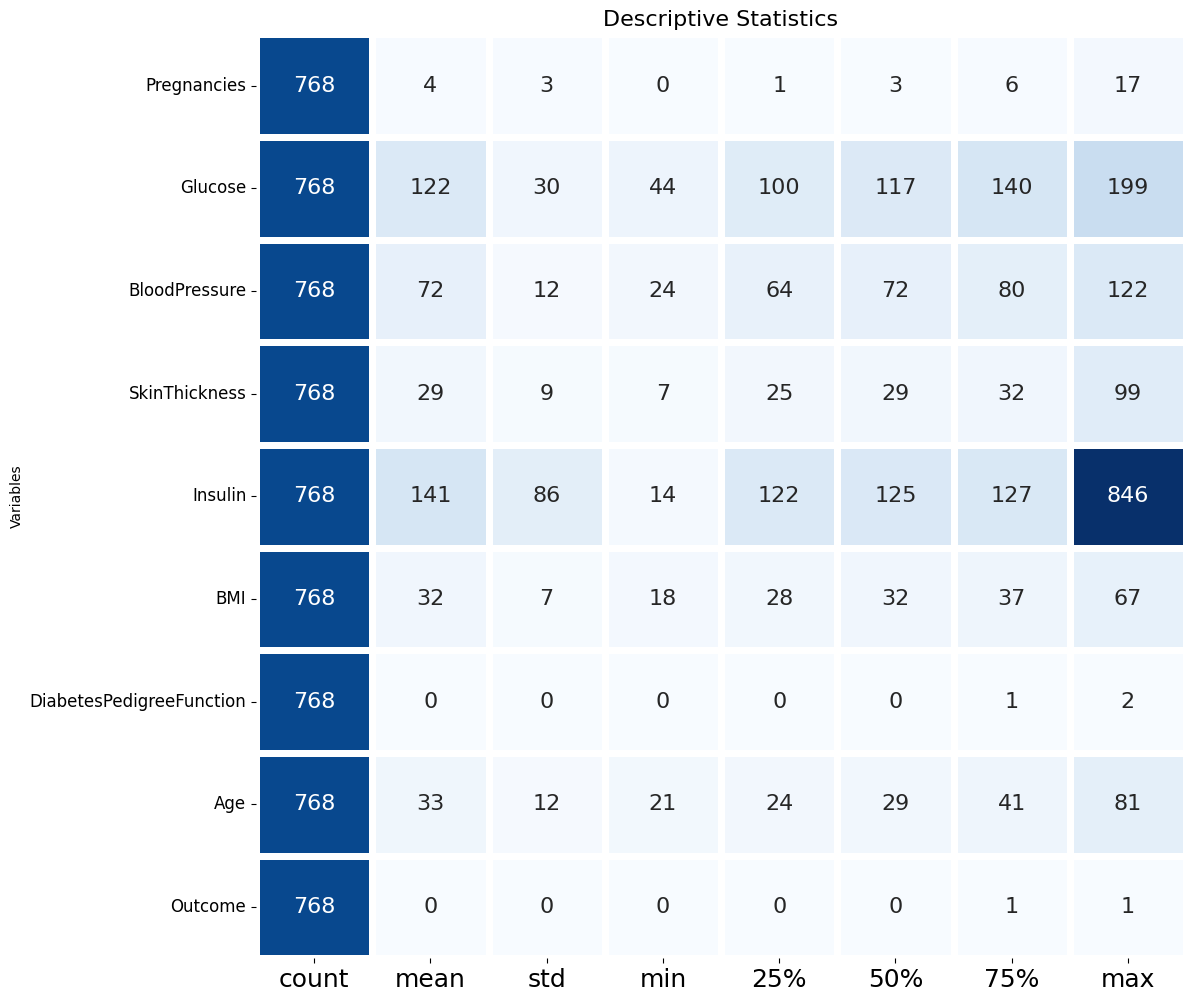

In [ ]:
# Show detaile data set
desc = diabets_df.describe().T
diabets_df2 = pd.DataFrame(index=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness',
                          'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
                   columns= ["count","mean","std","min",
                             "25%","50%","75%","max"], data= desc )

f,ax = plt.subplots(figsize=(12,12))

sns.heatmap(diabets_df2, annot=True,cmap = "Blues", fmt= '.0f',
            ax=ax,linewidths = 5, cbar = False,
            annot_kws={"size": 16})

plt.xticks(size = 18)
plt.yticks(size = 12, rotation = 0)
plt.ylabel("Variables")
plt.title("Descriptive Statistics", size = 16)
plt.show()

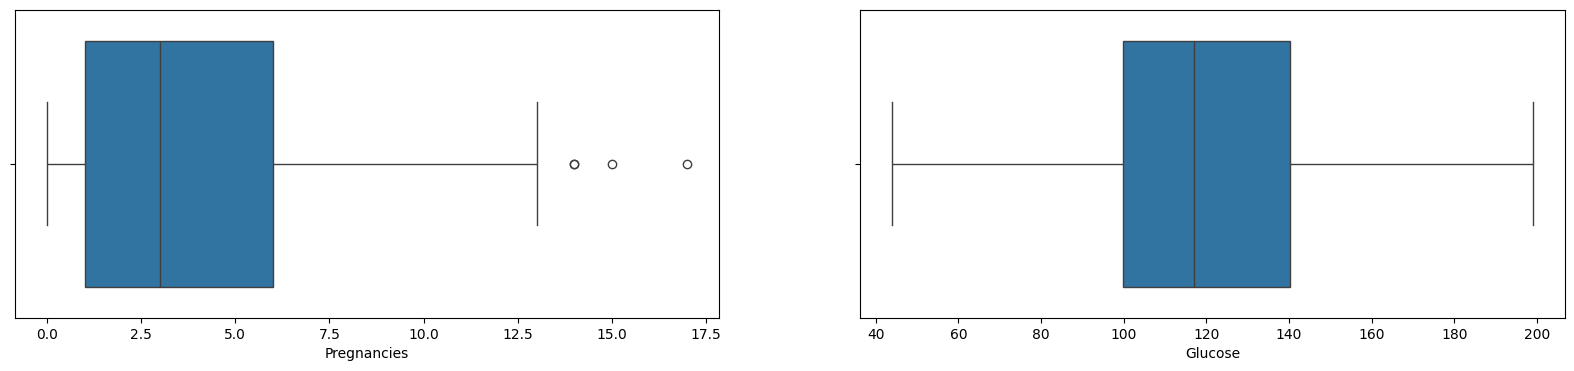

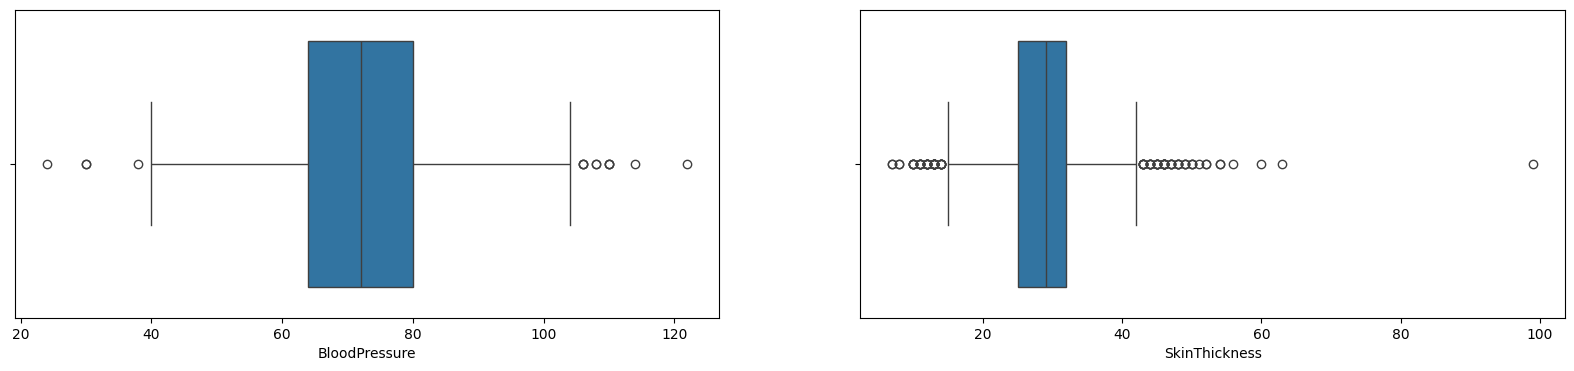

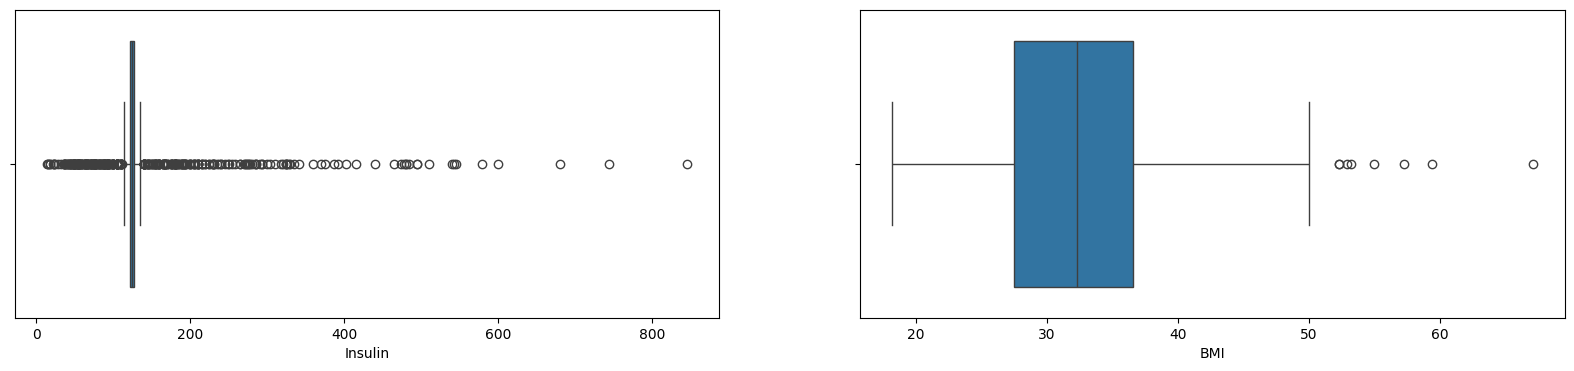

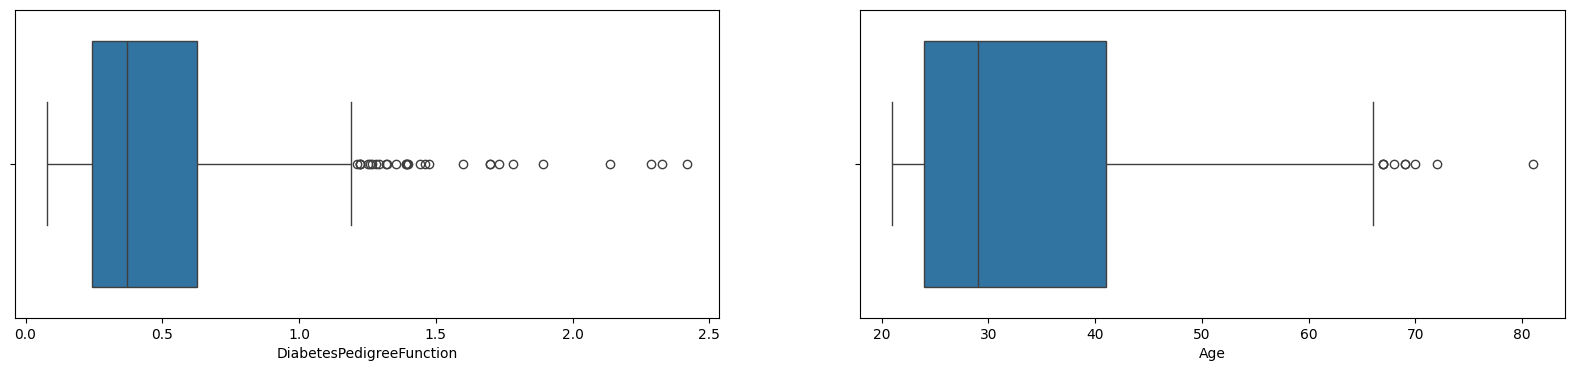

In [ ]:
## plot for numerical columns
Numerical = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness','Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
i = 0
while i <8:
    fig = plt.figure(figsize =[20,4])
    plt.subplot(1,2,1)   #(one row, two plots, firs one)
    sns.boxplot(x =Numerical[i], data = diabets_df )
    i+=1
    if i==8:
        break
    plt.subplot(1,2,2)
    sns.boxplot(x =Numerical[i], data = diabets_df)
    i+=1

    plt.show()

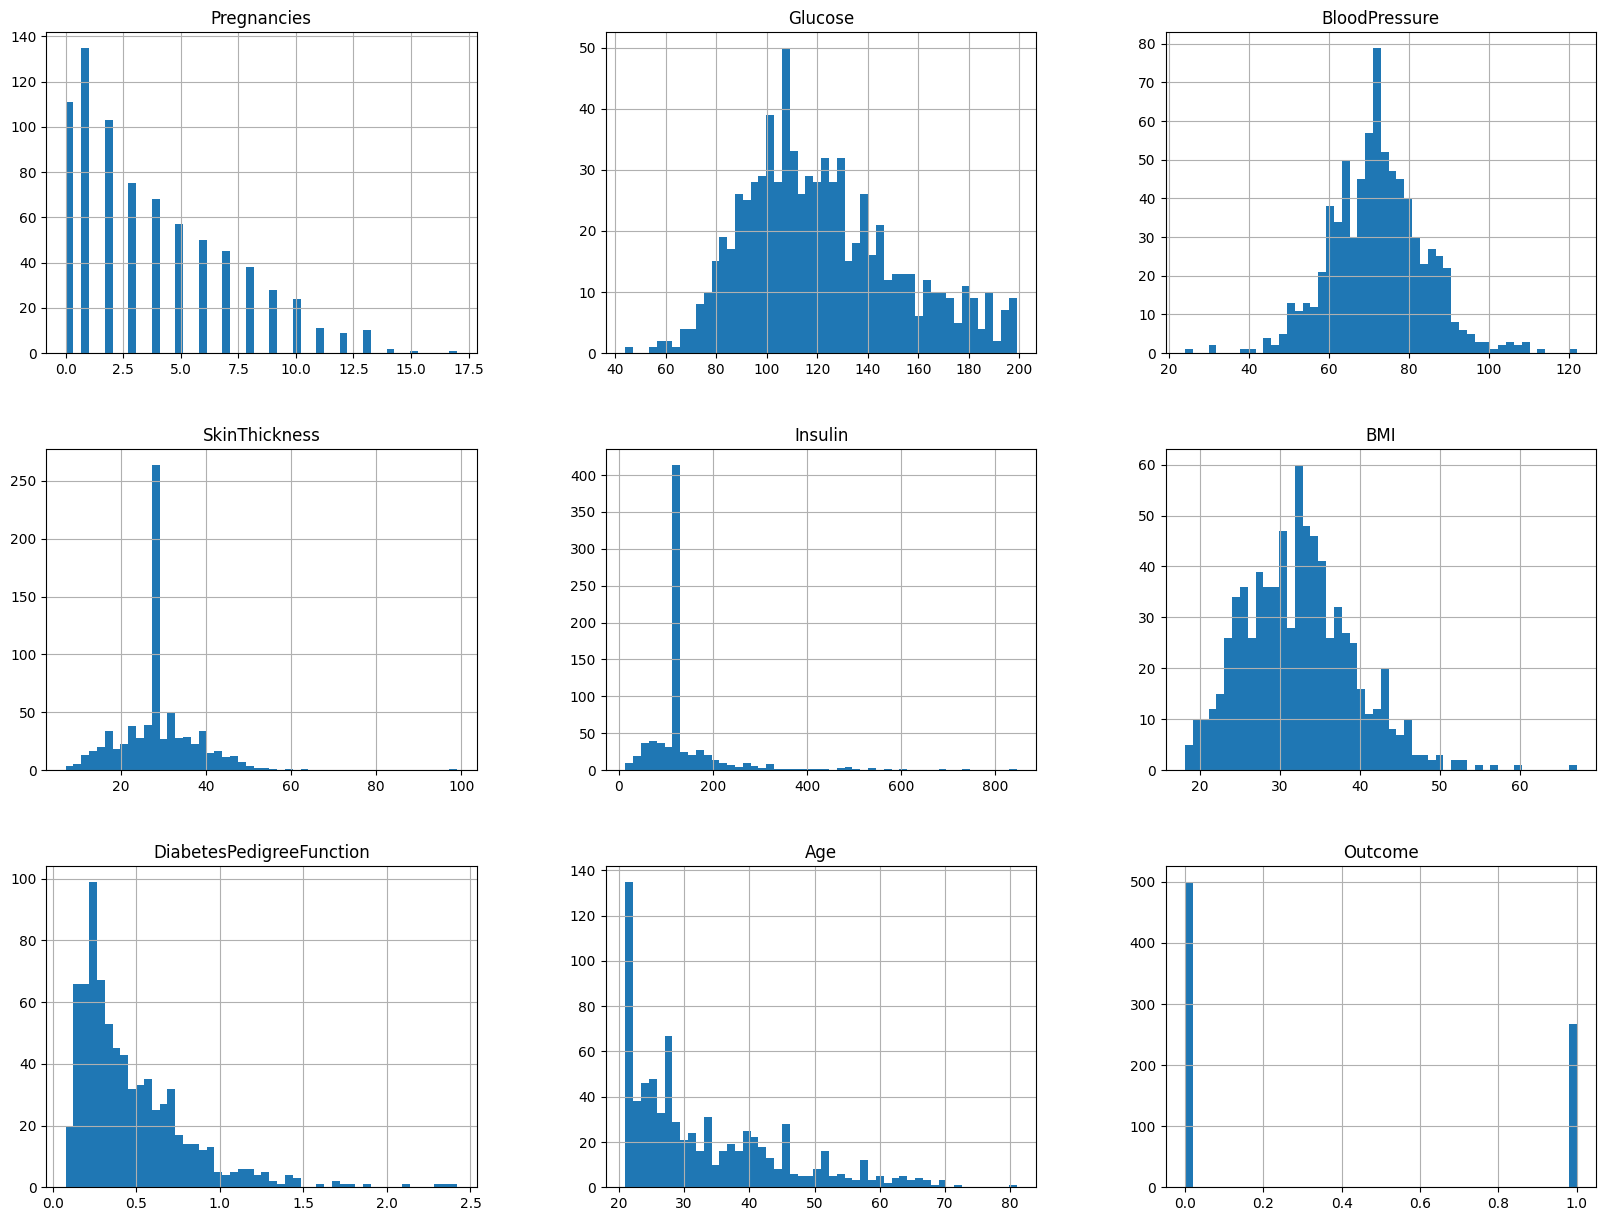

In [ ]:
#histogram
diabets_df.hist(bins=50,figsize=(20,15))
plt.show()

In [ ]:
diabets_df3 = diabets_df.copy()

zero_col = ['Glucose','Insulin','SkinThickness','BloodPressure','BMI']
diabets_df3[zero_col] = diabets_df3[zero_col].replace(0, np.nan)

I don't have expertise or science in medicine, but I think that glucose, insulin, skin thickness, blood pressure, and BMI cannot have a zero value, and since I don't have access to the owner of the data to research this data, so I have to fill or drop these data

The features do not have much correlation with each other and therefore they cannot be filled according to each other. Also, since the number of false zero data is high, removing them is not a good solution so I fill them according to distribution data

Mean is most useful when the original data is not skewed, while the median is more robust, not sensitive to outliers, and thus used when data is skewed.

As can be seen in the data distribution charts, insulin, glucose and skin thickness are deviated to the right and left, so we fill them with Madin. On the other hand, BMI and blood pressure have a normal distribution and we use the average to fill them

In [ ]:
for col in ['Glucose','Insulin','SkinThickness']:
    median_col = np.median(diabets_df3[diabets_df3[col].notna()][col])
    diabets_df3[col] = diabets_df3[col].fillna(median_col)
for col in ['BMI','BloodPressure']:
    mean_col = np.mean(diabets_df3[diabets_df3[col].notna()][col])
    diabets_df3[col] = diabets_df3[col].fillna(mean_col)

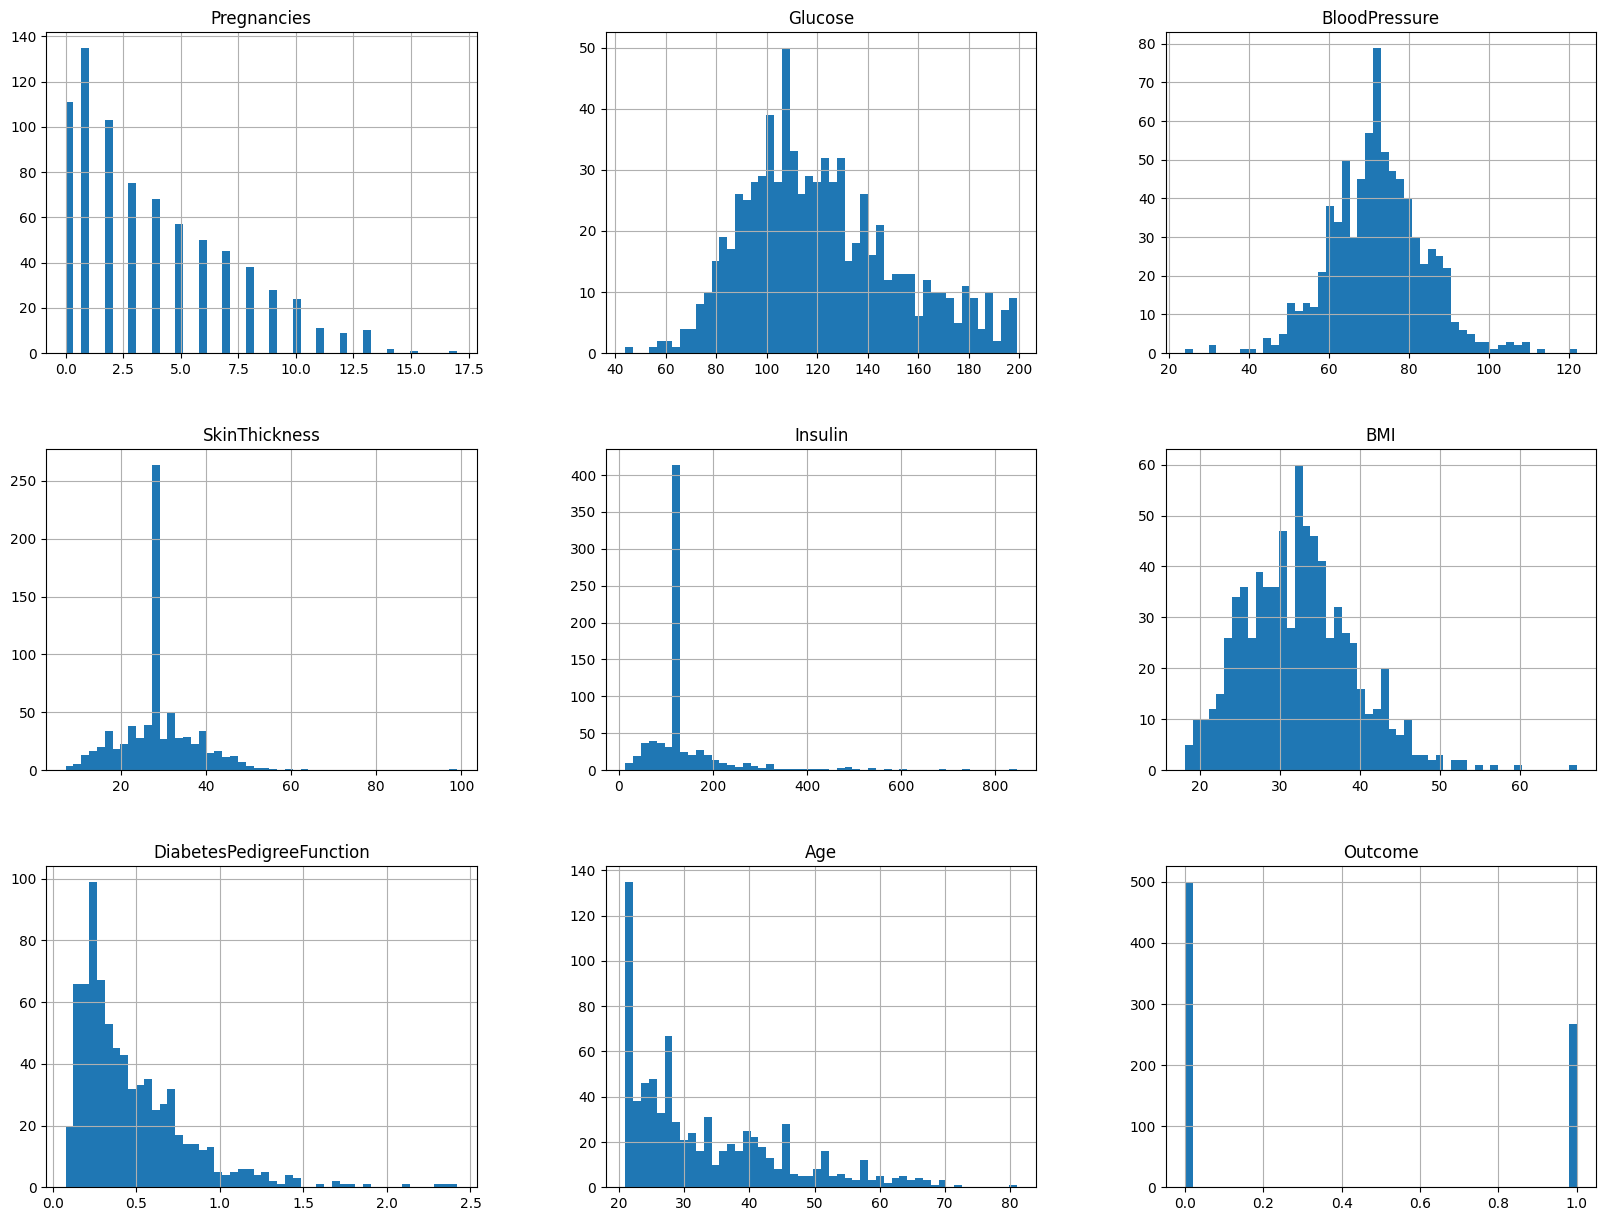

In [ ]:
#histogram
diabets_df3.hist(bins=50,figsize=(20,15))
plt.show()

In [ ]:
diabets_df3.isna().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


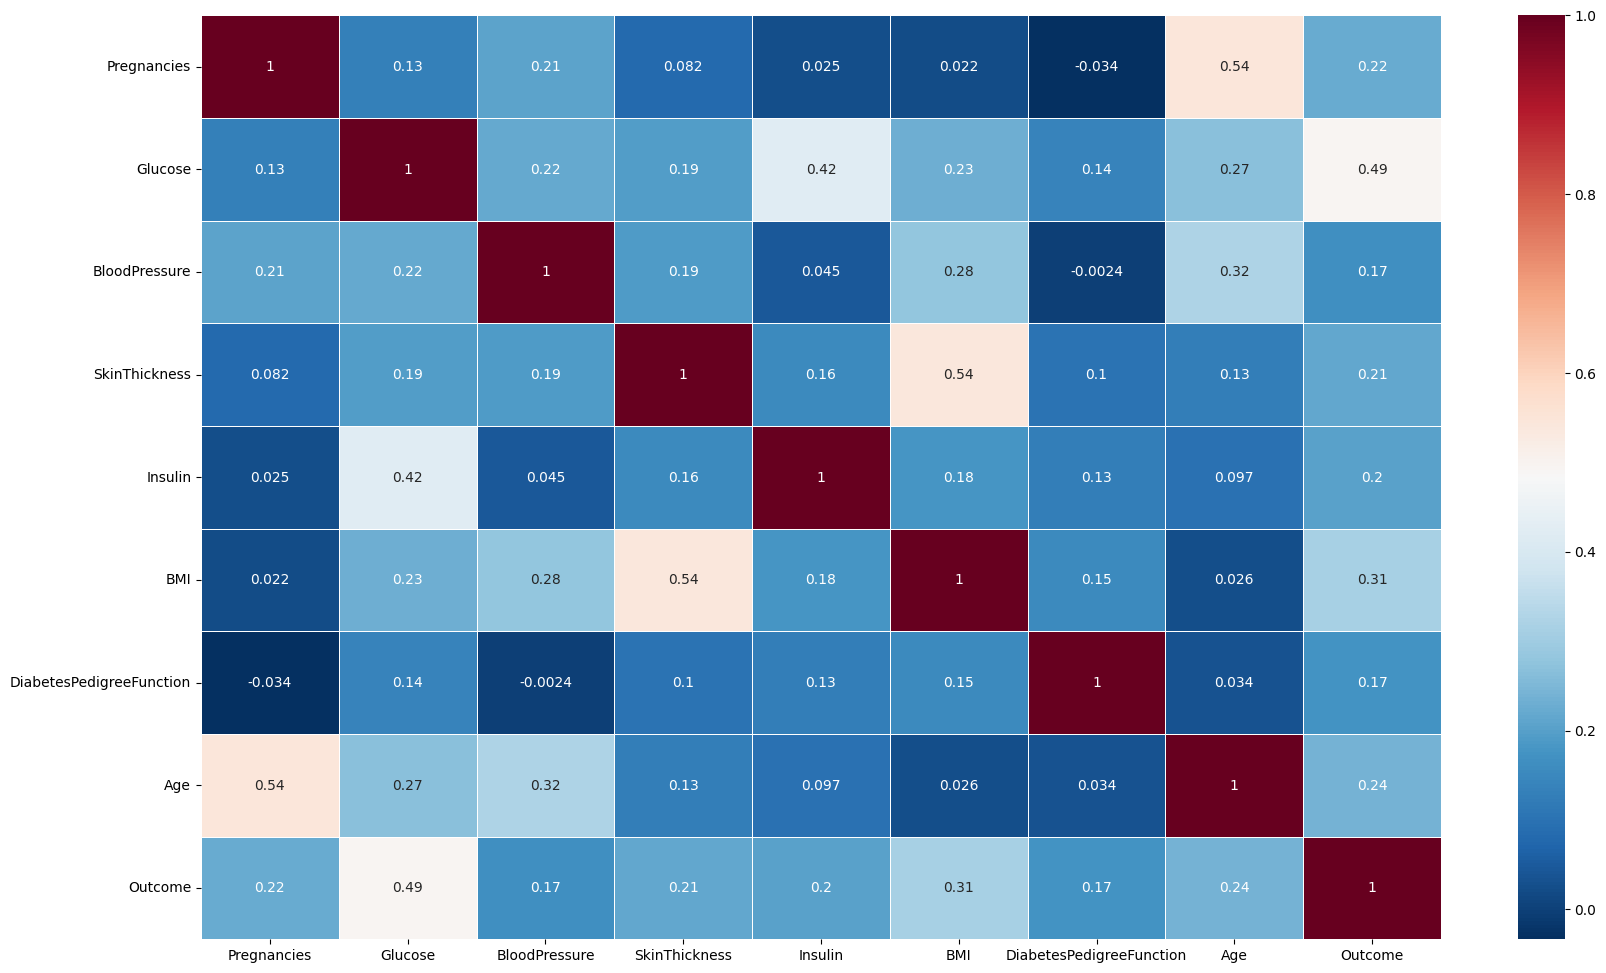

In [ ]:
## Show correlation
fig, ax = plt.subplots(figsize = (20, 12)) #Size of plot
ax = sns.heatmap(diabets_df3.corr(),cmap='RdBu_r',cbar=True,annot=True,linewidths=0.5,ax=ax)
plt.show()

###  Best correlation for Glucose

In [ ]:
#correlation
diabets_df3.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.128213,0.208615,0.081770,0.025047,0.021559,-0.033523,0.544341,0.221898
Glucose,0.128213,1.000000,0.218937,0.192615,0.419451,0.231049,0.137327,0.266909,0.492782
BloodPressure,0.208615,0.218937,1.000000,0.191892,0.045363,0.281257,-0.002378,0.324915,0.165723
SkinThickness,0.081770,0.192615,0.191892,1.000000,0.155610,0.543205,0.102188,0.126107,0.214873
Insulin,0.025047,0.419451,0.045363,0.155610,1.000000,0.180241,0.126503,0.097101,0.203790
BMI,0.021559,0.231049,0.281257,0.543205,0.180241,1.000000,0.153438,0.025597,0.312038
DiabetesPedigreeFunction,-0.033523,0.137327,-0.002378,0.102188,0.126503,0.153438,1.000000,0.033561,0.173844
Age,0.544341,0.266909,0.324915,0.126107,0.097101,0.025597,0.033561,1.000000,0.238356
Outcome,0.221898,0.492782,0.165723,0.214873,0.203790,0.312038,0.173844,0.238356,1.000000


In [ ]:
diabets_df3.corr()['Outcome'].sort_values(ascending=False) #Correlation for get information

,Outcome
Outcome,1.000000
Glucose,0.492782
BMI,0.312038
Age,0.238356
Pregnancies,0.221898
SkinThickness,0.214873
Insulin,0.203790
DiabetesPedigreeFunction,0.173844
BloodPressure,0.165723


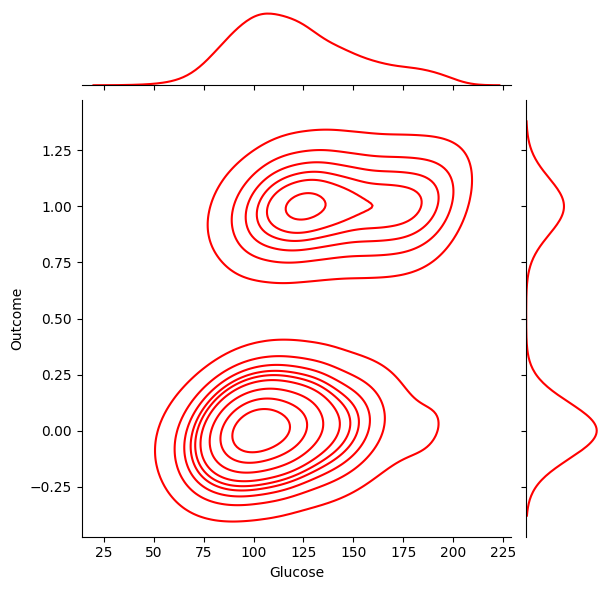

In [ ]:
#### How does Glucose is affected by price
sns.jointplot(x='Glucose',y='Outcome',data=diabets_df3,color='red',kind='kde');

##  Creating & Training KNN Model

In [ ]:
# Sellecting features
X = pd.DataFrame(diabets_df3, columns = ["Glucose","BloodPressure", "SkinThickness", "Insulin","BMI","DiabetesPedigreeFunction","Age"]).values
Y = diabets_df3.Outcome.values.reshape(-1,1)
X

array([[148.   ,  72.   ,  35.   , ...,  33.6  ,   0.627,  50.   ],
       [ 85.   ,  66.   ,  29.   , ...,  26.6  ,   0.351,  31.   ],
       [183.   ,  64.   ,  29.   , ...,  23.3  ,   0.672,  32.   ],
       ...,
       [121.   ,  72.   ,  23.   , ...,  26.2  ,   0.245,  30.   ],
       [126.   ,  60.   ,  29.   , ...,  30.1  ,   0.349,  47.   ],
       [ 93.   ,  70.   ,  31.   , ...,  30.4  ,   0.315,  23.   ]])

In [ ]:
# Splitting the data
X_train, X_test, Y_train, Y_test  =  train_test_split(X,Y, test_size = 0.3, random_state = 0)

### Modeling

In [ ]:
K = 3
CLF = KNeighborsClassifier(K)
CLF.fit(X_train,Y_train.ravel() )
Y_pred = CLF.predict(X_test)

In [ ]:
# Select Best value for K
K = 20
Acc = np.zeros((K))
for i in range(1 , K+1):
    CLF = KNeighborsClassifier(n_neighbors = i)
    CLF.fit(X_train,Y_train.ravel())
    Y_pred = CLF.predict(X_test)
    Acc[i-1] = metrics.accuracy_score(Y_test, Y_pred)
Acc

array([0.63203463, 0.6969697 , 0.70995671, 0.74025974, 0.71861472,
       0.71861472, 0.72294372, 0.75757576, 0.75324675, 0.74891775,
       0.74891775, 0.73593074, 0.73160173, 0.74025974, 0.74025974,
       0.74891775, 0.74891775, 0.74891775, 0.75757576, 0.74025974])

In [ ]:
# Show max & min
print(np.max(Acc))
print(np.min(Acc))

0.7575757575757576
0.6320346320346321


In [ ]:
########  Another way

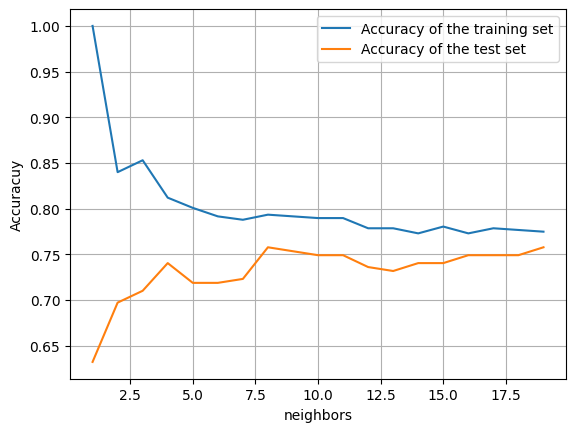

In [ ]:
traing_acc = []
test_acc = []
# try KNN for diffrent k nearset neighbor from 1 ta 50
neighbors_setting = range(1,20)

for n_neighbors in neighbors_setting:
    knn = KNeighborsClassifier(n_neighbors = n_neighbors)
    knn.fit(X_train,Y_train.ravel())
    traing_acc.append(knn.score(X_train,Y_train))
    test_acc.append(knn.score(X_test, Y_test))

plt.plot(neighbors_setting, traing_acc, label = "Accuracy of the training set")
plt.plot(neighbors_setting, test_acc, label = "Accuracy of the test set")
plt.ylabel("Accuracuy")
plt.xlabel("neighbors")
plt.grid()
plt.legend()


In [ ]:
#### Improval Model

In [ ]:
from sklearn.model_selection import GridSearchCV
parametrs = {"n_neighbors": range(1,20) }
grid_kn = GridSearchCV(estimator = knn, #Model
                       param_grid = parametrs, #Range of K
                       scoring = "accuracy",
                       cv = 5,          # cross validation generator
                       verbose = 1,     #Time of calculate
                       n_jobs = -1)     #help to cpu



grid_kn.fit(X_train, Y_train.ravel())

Fitting 5 folds for each of 19 candidates, totalling 95 fits


GridSearchCV(cv=5, estimator=KNeighborsClassifier(n_neighbors=19), n_jobs=-1,
             param_grid={'n_neighbors': range(1, 20)}, scoring='accuracy',
             verbose=1)

In [ ]:
CLF.score(X,Y)

0.7578125

In [ ]:
print("Accuracy:" , metrics.accuracy_score(Y_test,Y_pred ))

Accuracy: 0.7402597402597403


In [ ]:
confusion_matrix(Y,CLF.predict(X))

array([[440,  60],
       [126, 142]])

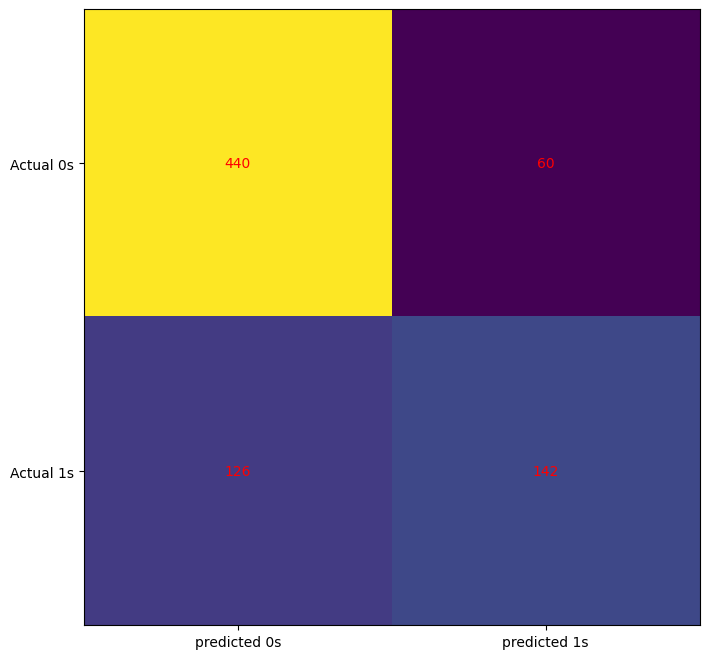

In [ ]:
# Show plot for confusion matrix
cm = confusion_matrix(Y, CLF.predict(X))
fig , ax = plt.subplots(figsize = (8,8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks = (0,1) , ticklabels = ("predicted 0s", "predicted 1s"))
ax.yaxis.set(ticks = (0,1) , ticklabels = ("Actual 0s", "Actual 1s"))
ax.set_ylim(1.5 , -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i , cm[i,j], ha = "center" , va = "center", color = "red")
plt.show()

In [ ]:
# Calculate classification
print(classification_report(Y, CLF.predict(X)))

              precision    recall  f1-score   support

           0       0.78      0.88      0.83       500
           1       0.70      0.53      0.60       268

    accuracy                           0.76       768
   macro avg       0.74      0.70      0.71       768
weighted avg       0.75      0.76      0.75       768



##  Creating & Training Logestic Regression Model

In [ ]:
# Sellecting features
X = pd.DataFrame(diabets_df3 , columns = ["Pregnancies","Glucose","BloodPressure","SkinThickness","Insulin","BMI","DiabetesPedigreeFunction","Age"])
Y = diabets_df3.Outcome

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.25, random_state =0)

In [ ]:
Logreg = LogisticRegression(solver = "liblinear")

In [ ]:
Logreg.fit(X_train , Y_train)
Y_pred = Logreg.predict(X_test)

In [ ]:
Y_pred

array([1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0])

In [ ]:
print("Accuracy:" , metrics.accuracy_score(Y_test,Y_pred ))

Accuracy: 0.7708333333333334


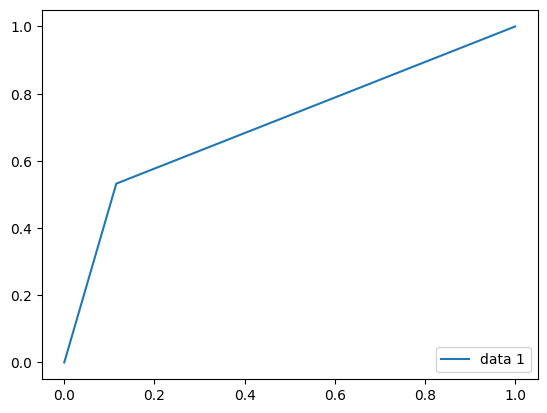

In [ ]:
fpr , tpr,_ = metrics.roc_curve(Y_test,Y_pred)
plt.plot(fpr , tpr, label = "data 1")
plt.legend(loc = 4)
plt.show()

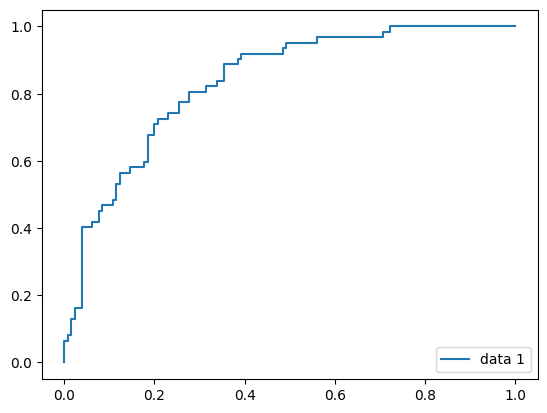

In [ ]:
Y_pred_proba = Logreg.predict_proba(X_test)[::,1]
fpr , tpr,_ = metrics.roc_curve(Y_test,Y_pred_proba)
plt.plot(fpr , tpr, label = "data 1")
plt.legend(loc = 4)
plt.show()

In [ ]:
Logreg.classes_

array([0, 1])

In [ ]:
Logreg.intercept_

array([-5.07399717])

In [ ]:
Logreg.coef_

array([[ 0.09144242,  0.03055074, -0.03403976, -0.01180599, -0.00089272,
         0.07654512,  0.57682913,  0.0149079 ]])

In [ ]:
Logreg.predict_proba(X)

array([[0.33192582, 0.66807418],
       [0.91572397, 0.08427603],
       [0.22028558, 0.77971442],
       ...,
       [0.75923466, 0.24076534],
       [0.60432471, 0.39567529],
       [0.89568187, 0.10431813]])

In [ ]:
Logreg.score(X,Y)

0.7669270833333334

In [ ]:
confusion_matrix(Y, Logreg.predict(X))

array([[441,  59],
       [120, 148]])

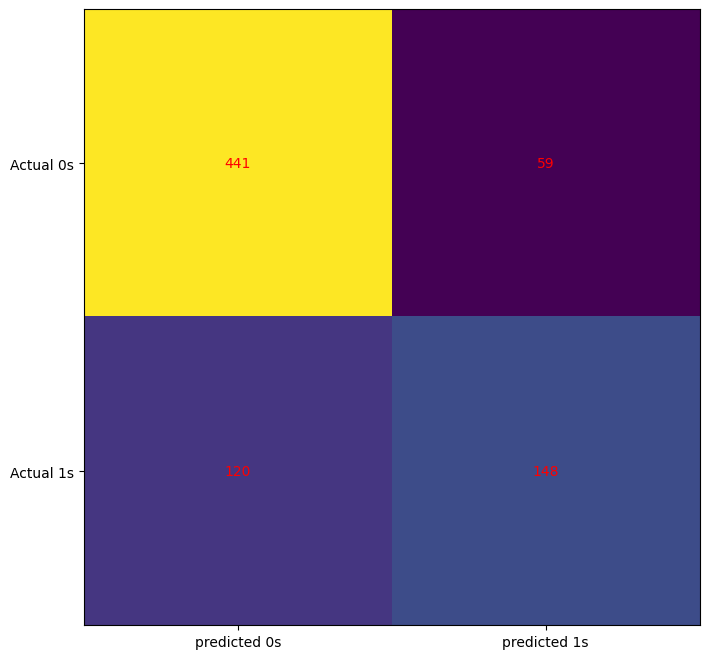

In [ ]:
# show plot for confusion matrix
cm = confusion_matrix(Y, Logreg.predict(X))
fig , ax = plt.subplots(figsize = (8,8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks = (0,1) , ticklabels = ("predicted 0s", "predicted 1s"))
ax.yaxis.set(ticks = (0,1) , ticklabels = ("Actual 0s", "Actual 1s"))
ax.set_ylim(1.5 , -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i , cm[i,j], ha = "center" , va = "center", color = "red")
plt.show()

In [ ]:
print(classification_report(Y, Logreg.predict(X)))

              precision    recall  f1-score   support

           0       0.79      0.88      0.83       500
           1       0.71      0.55      0.62       268

    accuracy                           0.77       768
   macro avg       0.75      0.72      0.73       768
weighted avg       0.76      0.77      0.76       768



## Creating & Training SVM Model

In [ ]:
# Sellecting features
X = pd.DataFrame(diabets_df3 , columns = ["Pregnancies","Glucose","BloodPressure","SkinThickness","Insulin","BMI","DiabetesPedigreeFunction","Age"])
Y = diabets_df3.Outcome

In [ ]:
# Splitting the data

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.25 ,random_state = 1)

In [ ]:
#Model
clf_svm = SVC(C=10.0)
clf_svm = clf_svm.fit(X_train,Y_train )
y_pred = clf_svm.predict(X_test)

In [ ]:
print("Accuracy: ", metrics.accuracy_score(Y_test, y_pred))

Accuracy:  0.765625


In [ ]:
confusion_matrix(Y, clf_svm.predict(X))

array([[457,  43],
       [124, 144]])

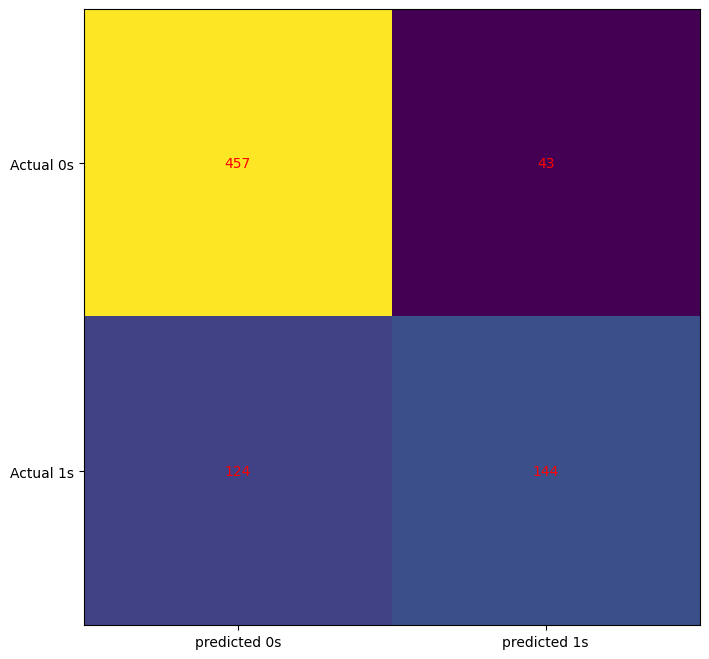

In [ ]:
# show plot for confusion matrix
cm = confusion_matrix(Y, clf_svm.predict(X))
fig , ax = plt.subplots(figsize = (8,8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks = (0,1) , ticklabels = ("predicted 0s", "predicted 1s"))
ax.yaxis.set(ticks = (0,1) , ticklabels = ("Actual 0s", "Actual 1s"))
ax.set_ylim(1.5 , -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i , cm[i,j], ha = "center" , va = "center", color = "red")
plt.show()

## Conclusion:Best Algorithm is Logestic Regression In the Original Dataset

KNN Accuracy:  0.7402597402597403
    
Logestic Regression Accuracy: 0.7708333333333334
    
SVM Accuracy:  0.765625

In [17]:
# Our Training of the Model started from Here....

In [ ]:
# Another run using new algorithms: Random Forest, XGBoost, and Voting Classifier
# Accuracies did quite improve

In [50]:
# Import necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE

# Load dataset (assuming pre-processed)
data = pd.read_csv('/content/drive/My Drive/SahaaaMLModel/diabetes.csv')  # Update the path accordingly

# Data Cleaning - Filling NaNs with median for certain columns
cols_to_clean = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
data[cols_to_clean] = data[cols_to_clean].replace(0, np.nan)
data[cols_to_clean] = data[cols_to_clean].fillna(data[cols_to_clean].median())

In [51]:
print(data.info())
print(data.describe())
print(data.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    float64
 2   BloodPressure             768 non-null    float64
 3   SkinThickness             768 non-null    float64
 4   Insulin                   768 non-null    float64
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(6), int64(3)
memory usage: 54.1 KB
None
       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  121.656250      72.386719      29.108073  140.671875   
std    

In [52]:
# Define features and target
X = data[["Pregnancies", "Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI", "DiabetesPedigreeFunction", "Age"]]
Y = data["Outcome"]



In [ ]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
# Splitting the dataset
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=1)

In [53]:
# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [ ]:
# Store training and testing accuracies for different k-values
training_acc = []
testing_acc = []

# Try KNN for different k-nearest neighbors from 1 to 20
neighbors_setting = range(1, 20)

for n_neighbors in neighbors_setting:
    knn = KNeighborsClassifier(n_neighbors=n_neighbors)
    knn.fit(X_train_scaled, Y_train)

    # Append training accuracy
    training_acc.append(knn.score(X_train_scaled, Y_train))

    # Append testing accuracy
    testing_acc.append(knn.score(X_test_scaled, Y_test))

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(neighbors_setting, training_acc, label="Training Accuracy", marker='o')
plt.plot(neighbors_setting, testing_acc, label="Testing Accuracy", marker='o')

# Add titles and labels
plt.ylabel("Accuracy")
plt.xlabel("Number of Neighbors (k)")
plt.title("KNN: Training vs Testing Accuracy for Different k")
plt.legend()
plt.grid(True)
plt.show()

In [54]:
### 1. KNN Model with Hyperparameter Tuning
knn_params = {'n_neighbors': np.arange(1, 30)}
knn = KNeighborsClassifier()
grid_knn = GridSearchCV(knn, knn_params, cv=5, scoring='accuracy')
grid_knn.fit(X_train_scaled, Y_train)
knn_best = grid_knn.best_estimator_

In [55]:
### 2. Logistic Regression Model with Hyperparameter Tuning
logreg_params = {'C': [0.01, 0.1, 1, 10, 100], 'solver': ['liblinear']}
logreg = LogisticRegression()
grid_logreg = GridSearchCV(logreg, logreg_params, cv=5, scoring='accuracy')
grid_logreg.fit(X_train_scaled, Y_train)
log_reg_best = grid_logreg.best_estimator_

In [56]:
### 3. SVM Model with Hyperparameter Tuning
svm_params = {'C': [0.01, 0.1, 1, 10, 100], 'kernel': ['linear', 'rbf']}
svm = SVC(probability=True)
grid_svm = GridSearchCV(svm, svm_params, cv=5, scoring='accuracy')
grid_svm.fit(X_train_scaled, Y_train)
svm_best = grid_svm.best_estimator_

In [57]:
### 4. Random Forest Model with Hyperparameter Tuning
rf_params = {'n_estimators': [50, 100, 200], 'max_depth': [5, 10, 20], 'criterion': ['gini', 'entropy']}
rf = RandomForestClassifier()
grid_rf = GridSearchCV(rf, rf_params, cv=5, scoring='accuracy')
grid_rf.fit(X_train_scaled, Y_train)
rf_best = grid_rf.best_estimator_


In [58]:
### 5. XGBoost Model with Hyperparameter Tuning
xgb_params = {'n_estimators': [50, 100, 200], 'learning_rate': [0.01, 0.1, 0.2], 'max_depth': [3, 5, 10]}
xgb = XGBClassifier()
grid_xgb = GridSearchCV(xgb, xgb_params, cv=5, scoring='accuracy')
grid_xgb.fit(X_train_scaled, Y_train)
xgb_best = grid_xgb.best_estimator_


In [59]:
### 6. Voting Classifier (Ensemble of KNN, Logistic Regression, SVM, Random Forest, XGBoost)
voting_clf = VotingClassifier(estimators=[
    ('knn', knn_best),
    ('log_reg', log_reg_best),
    ('svm', svm_best),
    ('rf', rf_best),
    ('xgb', xgb_best)
], voting='soft')  # 'soft' to consider probability for voting

In [60]:
voting_clf.fit(X_train_scaled, Y_train)
voting_pred = voting_clf.predict(X_test_scaled)
voting_acc = accuracy_score(Y_test, voting_pred)

In [61]:
# Print accuracies for all models
print(f"KNN Accuracy: {accuracy_score(Y_test, knn_best.predict(X_test_scaled)):.16f}")
print(f"Logistic Regression Accuracy: {accuracy_score(Y_test, log_reg_best.predict(X_test_scaled)):.16f}")
print(f"SVM Accuracy: {accuracy_score(Y_test, svm_best.predict(X_test_scaled)):.16f}")
print(f"Random Forest Accuracy: {accuracy_score(Y_test, rf_best.predict(X_test_scaled)):.16f}")
print(f"XGBoost Accuracy: {accuracy_score(Y_test, xgb_best.predict(X_test_scaled)):.16f}")
print(f"Voting Classifier Accuracy: {voting_acc:.16f}")

KNN Accuracy: 0.7760416666666666
Logistic Regression Accuracy: 0.7760416666666666
SVM Accuracy: 0.7656250000000000
Random Forest Accuracy: 0.7812500000000000
XGBoost Accuracy: 0.7916666666666666
Voting Classifier Accuracy: 0.7916666666666666


In [62]:
### Confusion Matrix and Classification Report for the Voting Classifier

print("\nVoting Classifier Confusion Matrix:")
print(confusion_matrix(Y_test, voting_pred))
print("\nVoting Classifier Classification Report:")
print(classification_report(Y_test, voting_pred))


Voting Classifier Confusion Matrix:
[[109  14]
 [ 26  43]]

Voting Classifier Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.89      0.84       123
           1       0.75      0.62      0.68        69

    accuracy                           0.79       192
   macro avg       0.78      0.75      0.76       192
weighted avg       0.79      0.79      0.79       192



In [63]:
# Plot confusion matrix for the best model (voting classifier)
def plot_confusion_matrix(cm, title="Confusion Matrix"):
    fig, ax = plt.subplots(figsize=(8, 8))
    ax.imshow(cm, cmap=plt.cm.Blues)
    ax.grid(False)
    ax.xaxis.set(ticks=(0, 1), ticklabels=("Predicted 0", "Predicted 1"))
    ax.yaxis.set(ticks=(0, 1), ticklabels=("Actual 0", "Actual 1"))
    ax.set_ylim(1.5, -0.5)
    for i in range(2):
        for j in range(2):
            ax.text(j, i, cm[i, j], ha="center", va="center", color="red")
    plt.title(title)
    plt.show()

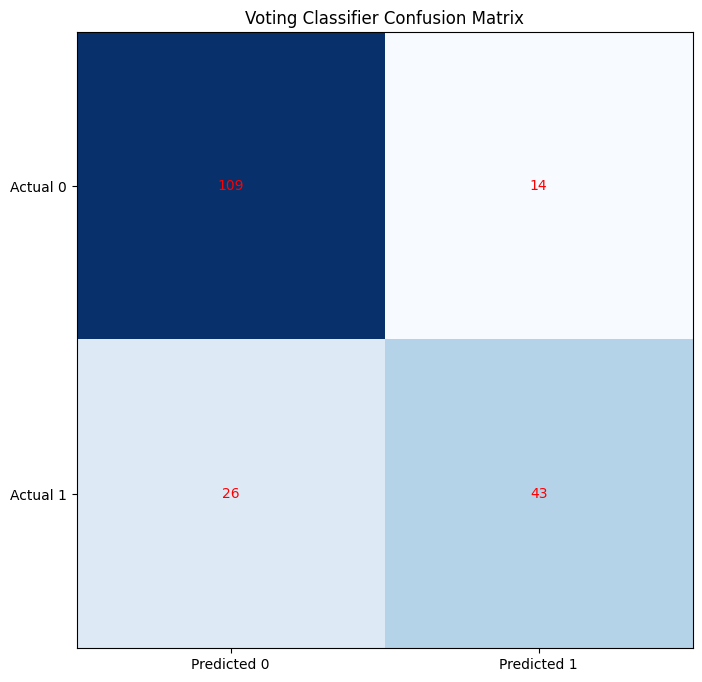

In [64]:
# Example for Voting Classifier
plot_confusion_matrix(confusion_matrix(Y_test, voting_pred), title="Voting Classifier Confusion Matrix")

In [65]:
#Another round went and this time accuracies of the 6 algoirthms used improved more

In [102]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, StackingClassifier
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE
from sklearn.pipeline import Pipeline

# Load dataset (assuming pre-processed)
data = pd.read_csv('/content/drive/My Drive/SahaaaMLModel/diabetes.csv')  # Update the path accordingly

# Data Cleaning - Filling NaNs with median for certain columns
cols_to_clean = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
data[cols_to_clean] = data[cols_to_clean].replace(0, np.nan)
data[cols_to_clean] = data[cols_to_clean].fillna(data[cols_to_clean].median())

In [103]:
print(data.info())
print(data.describe())
print(data.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    float64
 2   BloodPressure             768 non-null    float64
 3   SkinThickness             768 non-null    float64
 4   Insulin                   768 non-null    float64
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(6), int64(3)
memory usage: 54.1 KB
None
       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  121.656250      72.386719      29.108073  140.671875   
std    

In [104]:
# Define features and target
X = data[["Pregnancies", "Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI", "DiabetesPedigreeFunction", "Age"]]
Y = data["Outcome"]

# Splitting the dataset
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=1)

# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [105]:
# Handle class imbalance with SMOTE
smote = SMOTE(random_state=42)
X_train_balanced, Y_train_balanced = smote.fit_resample(X_train_scaled, Y_train)

# Tune models with wider hyperparameter ranges and better models

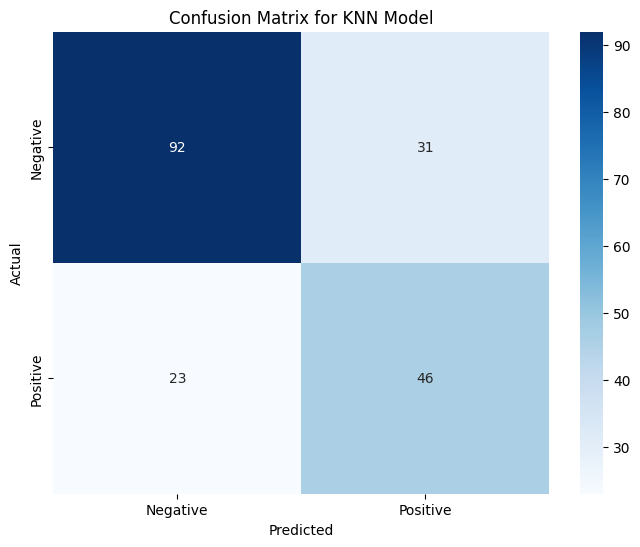

Classification Report for KNN Model:

              precision    recall  f1-score   support

    Negative       0.80      0.75      0.77       123
    Positive       0.60      0.67      0.63        69

    accuracy                           0.72       192
   macro avg       0.70      0.71      0.70       192
weighted avg       0.73      0.72      0.72       192



<Figure size 800x600 with 0 Axes>

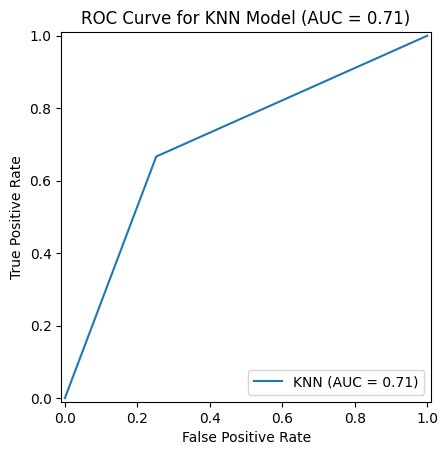

<Figure size 800x600 with 0 Axes>

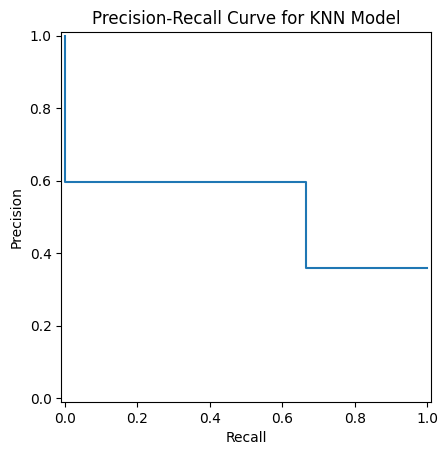

In [106]:
### 1. KNN Model
knn_params = {'n_neighbors': np.arange(1, 40)}
knn = KNeighborsClassifier()
grid_knn = GridSearchCV(knn, knn_params, cv=5, scoring='accuracy')
grid_knn.fit(X_train_balanced, Y_train_balanced)
knn_best = grid_knn.best_estimator_
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc, RocCurveDisplay
from sklearn.metrics import precision_recall_curve, PrecisionRecallDisplay
import numpy as np

# Get predictions on the test set using the best KNN model
knn_pred = knn_best.predict(X_test_scaled)

# 1. Confusion Matrix
cm = confusion_matrix(Y_test, knn_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Negative", "Positive"], yticklabels=["Negative", "Positive"])
plt.title('Confusion Matrix for KNN Model')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

# 2. Classification Report (Precision, Recall, F1-score)
print("Classification Report for KNN Model:\n")
print(classification_report(Y_test, knn_pred, target_names=["Negative", "Positive"]))

# 3. ROC Curve and AUC Score
fpr, tpr, thresholds = roc_curve(Y_test, knn_best.predict_proba(X_test_scaled)[:, 1])
roc_auc = auc(fpr, tpr)

# Plot ROC Curve
plt.figure(figsize=(8, 6))
RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name="KNN").plot()
plt.title(f'ROC Curve for KNN Model (AUC = {roc_auc:.2f})')
plt.show()

# 4. Precision-Recall Curve
precision, recall, thresholds = precision_recall_curve(Y_test, knn_best.predict_proba(X_test_scaled)[:, 1])

# Plot Precision-Recall Curve
plt.figure(figsize=(8, 6))
PrecisionRecallDisplay(precision=precision, recall=recall).plot()
plt.title('Precision-Recall Curve for KNN Model')
plt.show()



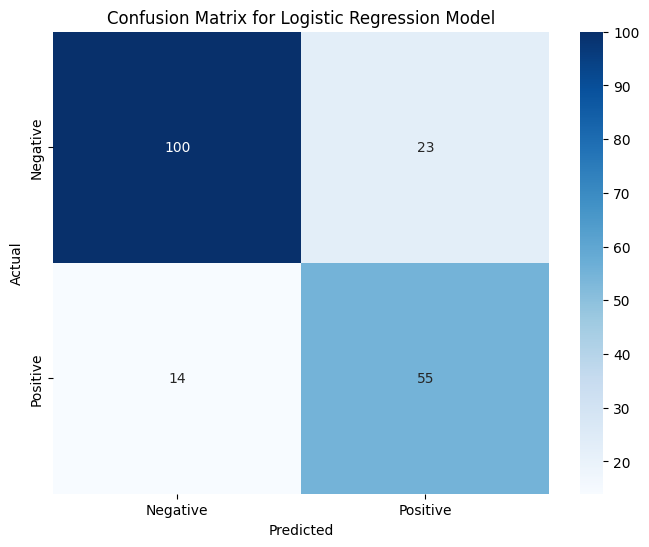

Classification Report for Logistic Regression Model:

              precision    recall  f1-score   support

    Negative       0.88      0.81      0.84       123
    Positive       0.71      0.80      0.75        69

    accuracy                           0.81       192
   macro avg       0.79      0.81      0.80       192
weighted avg       0.82      0.81      0.81       192



<Figure size 800x600 with 0 Axes>

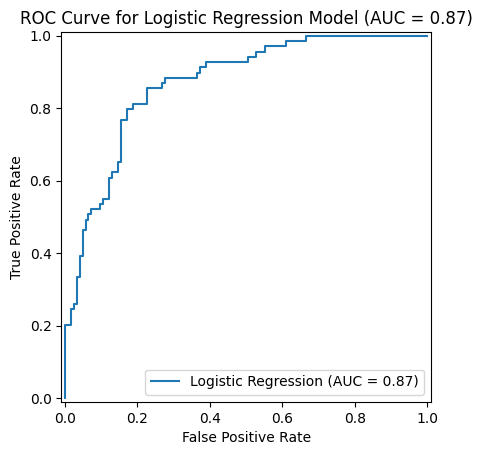

<Figure size 800x600 with 0 Axes>

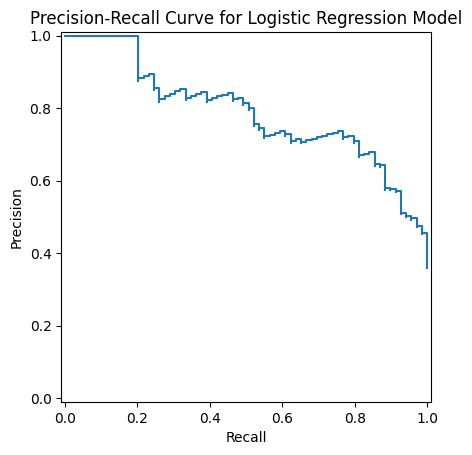

In [107]:
### 2. Logistic Regression Model
logreg_params = {'C': [0.01, 0.1, 1, 10, 100], 'solver': ['liblinear']}
logreg = LogisticRegression()
grid_logreg = GridSearchCV(logreg, logreg_params, cv=5, scoring='accuracy')
grid_logreg.fit(X_train_balanced, Y_train_balanced)
log_reg_best = grid_logreg.best_estimator_

# Get predictions on the test set using the best Logistic Regression model
logreg_pred = log_reg_best.predict(X_test_scaled)

# 1. Confusion Matrix
cm_logreg = confusion_matrix(Y_test, logreg_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_logreg, annot=True, fmt='d', cmap='Blues', xticklabels=["Negative", "Positive"], yticklabels=["Negative", "Positive"])
plt.title('Confusion Matrix for Logistic Regression Model')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

# 2. Classification Report (Precision, Recall, F1-score)
print("Classification Report for Logistic Regression Model:\n")
print(classification_report(Y_test, logreg_pred, target_names=["Negative", "Positive"]))

# 3. ROC Curve and AUC Score
fpr_logreg, tpr_logreg, thresholds_logreg = roc_curve(Y_test, log_reg_best.predict_proba(X_test_scaled)[:, 1])
roc_auc_logreg = auc(fpr_logreg, tpr_logreg)

# Plot ROC Curve
plt.figure(figsize=(8, 6))
RocCurveDisplay(fpr=fpr_logreg, tpr=tpr_logreg, roc_auc=roc_auc_logreg, estimator_name="Logistic Regression").plot()
plt.title(f'ROC Curve for Logistic Regression Model (AUC = {roc_auc_logreg:.2f})')
plt.show()

# 4. Precision-Recall Curve
precision_logreg, recall_logreg, thresholds_logreg = precision_recall_curve(Y_test, log_reg_best.predict_proba(X_test_scaled)[:, 1])

# Plot Precision-Recall Curve
plt.figure(figsize=(8, 6))
PrecisionRecallDisplay(precision=precision_logreg, recall=recall_logreg).plot()
plt.title('Precision-Recall Curve for Logistic Regression Model')
plt.show()


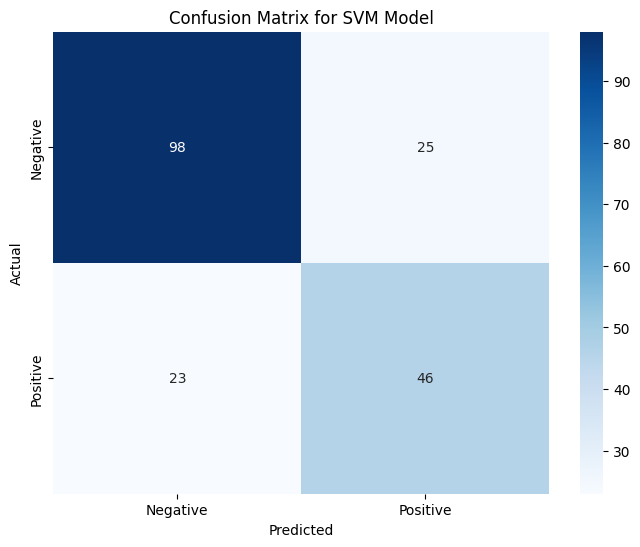

Classification Report for SVM Model:

              precision    recall  f1-score   support

    Negative       0.81      0.80      0.80       123
    Positive       0.65      0.67      0.66        69

    accuracy                           0.75       192
   macro avg       0.73      0.73      0.73       192
weighted avg       0.75      0.75      0.75       192



<Figure size 800x600 with 0 Axes>

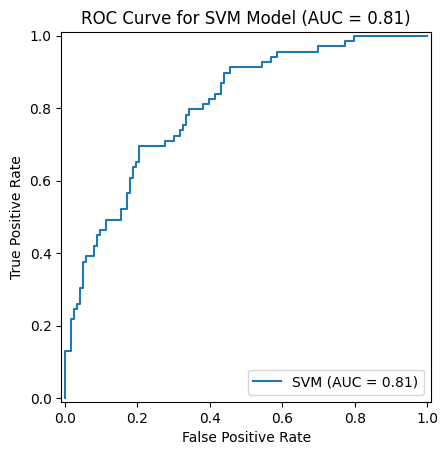

<Figure size 800x600 with 0 Axes>

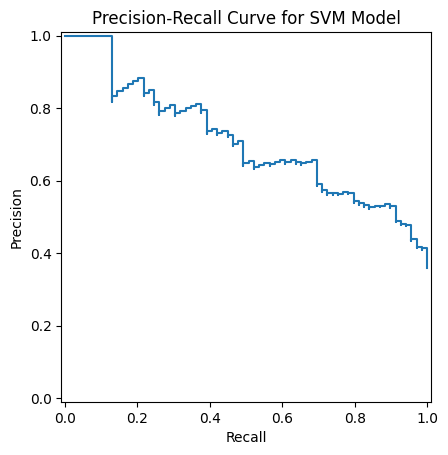

In [108]:
### 3. SVM Model
svm_params = {'C': [0.01, 0.1, 1, 10, 100], 'kernel': ['linear', 'rbf']}
svm = SVC(probability=True)
grid_svm = GridSearchCV(svm, svm_params, cv=5, scoring='accuracy')
grid_svm.fit(X_train_balanced, Y_train_balanced)
svm_best = grid_svm.best_estimator_

# Get predictions on the test set using the best SVM model
svm_pred = svm_best.predict(X_test_scaled)

# 1. Confusion Matrix
cm_svm = confusion_matrix(Y_test, svm_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Blues', xticklabels=["Negative", "Positive"], yticklabels=["Negative", "Positive"])
plt.title('Confusion Matrix for SVM Model')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

# 2. Classification Report (Precision, Recall, F1-score)
print("Classification Report for SVM Model:\n")
print(classification_report(Y_test, svm_pred, target_names=["Negative", "Positive"]))

# 3. ROC Curve and AUC Score
fpr_svm, tpr_svm, thresholds_svm = roc_curve(Y_test, svm_best.predict_proba(X_test_scaled)[:, 1])
roc_auc_svm = auc(fpr_svm, tpr_svm)

# Plot ROC Curve
plt.figure(figsize=(8, 6))
RocCurveDisplay(fpr=fpr_svm, tpr=tpr_svm, roc_auc=roc_auc_svm, estimator_name="SVM").plot()
plt.title(f'ROC Curve for SVM Model (AUC = {roc_auc_svm:.2f})')
plt.show()

# 4. Precision-Recall Curve
precision_svm, recall_svm, thresholds_svm = precision_recall_curve(Y_test, svm_best.predict_proba(X_test_scaled)[:, 1])

# Plot Precision-Recall Curve
plt.figure(figsize=(8, 6))
PrecisionRecallDisplay(precision=precision_svm, recall=recall_svm).plot()
plt.title('Precision-Recall Curve for SVM Model')
plt.show()


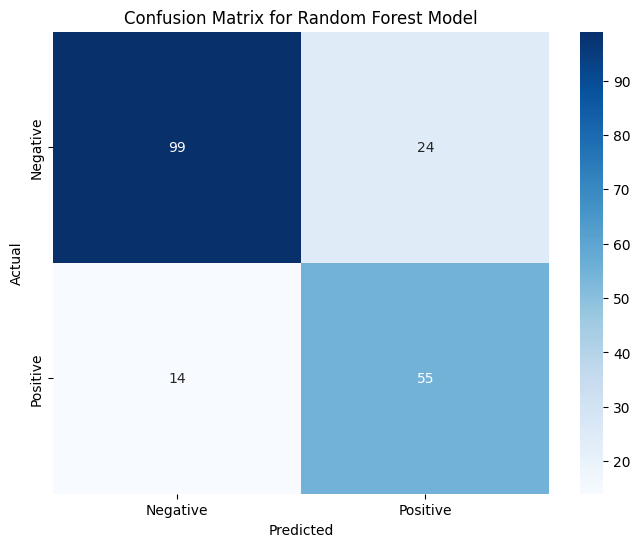

Classification Report for Random Forest Model:

              precision    recall  f1-score   support

    Negative       0.88      0.80      0.84       123
    Positive       0.70      0.80      0.74        69

    accuracy                           0.80       192
   macro avg       0.79      0.80      0.79       192
weighted avg       0.81      0.80      0.80       192



<Figure size 800x600 with 0 Axes>

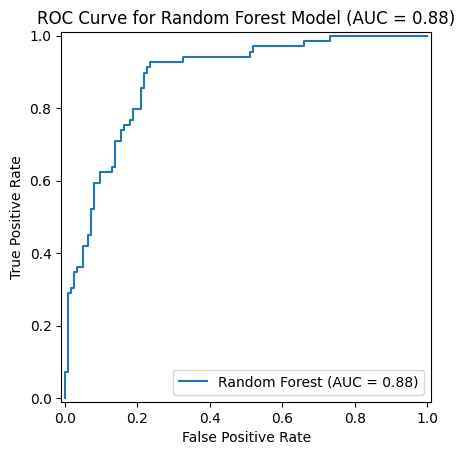

<Figure size 800x600 with 0 Axes>

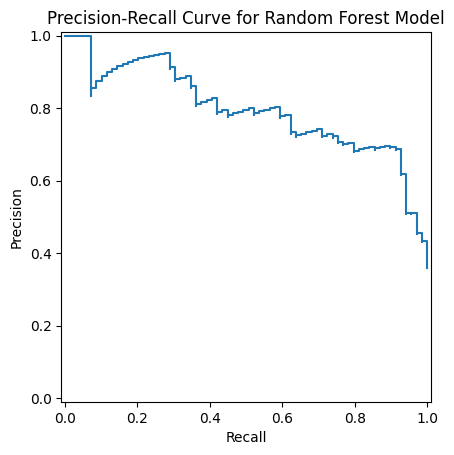

In [109]:
### 4. Random Forest Model
rf_params = {'n_estimators': [100, 200, 300], 'max_depth': [5, 10, 15, 20], 'criterion': ['gini', 'entropy']}
rf = RandomForestClassifier()
grid_rf = GridSearchCV(rf, rf_params, cv=5, scoring='accuracy')
grid_rf.fit(X_train_balanced, Y_train_balanced)
rf_best = grid_rf.best_estimator_

# Get predictions on the test set using the best Random Forest model
rf_pred = rf_best.predict(X_test_scaled)

# 1. Confusion Matrix
cm_rf = confusion_matrix(Y_test, rf_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', xticklabels=["Negative", "Positive"], yticklabels=["Negative", "Positive"])
plt.title('Confusion Matrix for Random Forest Model')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

# 2. Classification Report (Precision, Recall, F1-score)
print("Classification Report for Random Forest Model:\n")
print(classification_report(Y_test, rf_pred, target_names=["Negative", "Positive"]))

# 3. ROC Curve and AUC Score
fpr_rf, tpr_rf, thresholds_rf = roc_curve(Y_test, rf_best.predict_proba(X_test_scaled)[:, 1])
roc_auc_rf = auc(fpr_rf, tpr_rf)

# Plot ROC Curve
plt.figure(figsize=(8, 6))
RocCurveDisplay(fpr=fpr_rf, tpr=tpr_rf, roc_auc=roc_auc_rf, estimator_name="Random Forest").plot()
plt.title(f'ROC Curve for Random Forest Model (AUC = {roc_auc_rf:.2f})')
plt.show()

# 4. Precision-Recall Curve
precision_rf, recall_rf, thresholds_rf = precision_recall_curve(Y_test, rf_best.predict_proba(X_test_scaled)[:, 1])

# Plot Precision-Recall Curve
plt.figure(figsize=(8, 6))
PrecisionRecallDisplay(precision=precision_rf, recall=recall_rf).plot()
plt.title('Precision-Recall Curve for Random Forest Model')
plt.show()


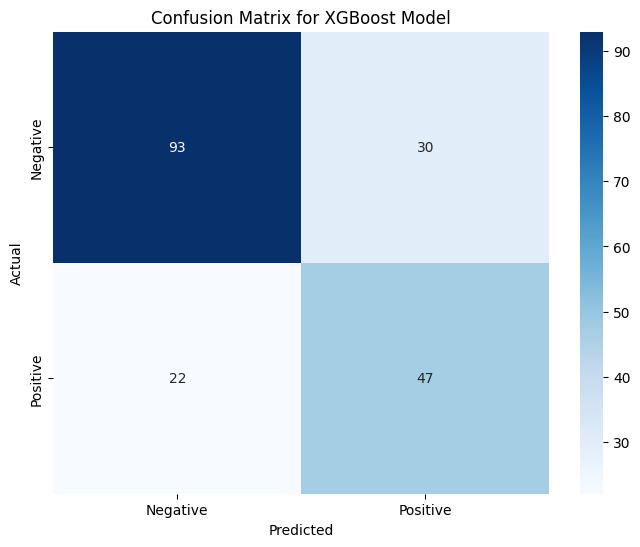

Classification Report for XGBoost Model:

              precision    recall  f1-score   support

    Negative       0.81      0.76      0.78       123
    Positive       0.61      0.68      0.64        69

    accuracy                           0.73       192
   macro avg       0.71      0.72      0.71       192
weighted avg       0.74      0.73      0.73       192



<Figure size 800x600 with 0 Axes>

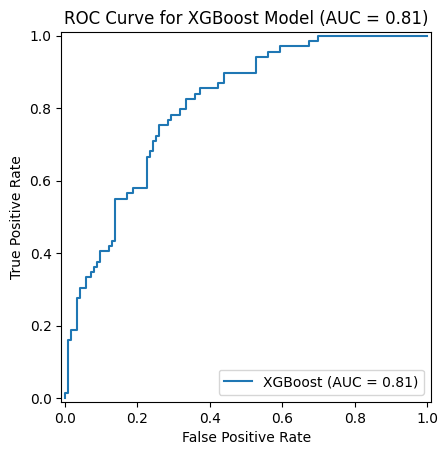

<Figure size 800x600 with 0 Axes>

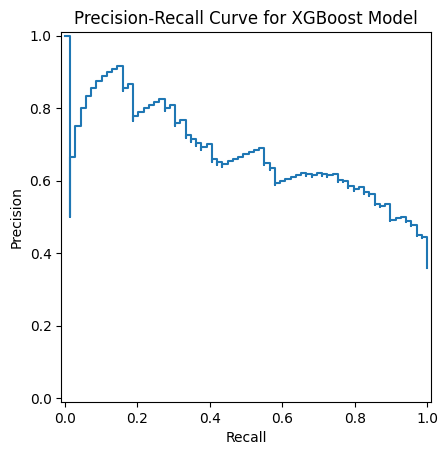

In [110]:
### 5. XGBoost Model
xgb_params = {'n_estimators': [100, 200, 300], 'learning_rate': [0.01, 0.1, 0.2], 'max_depth': [3, 5, 10]}
xgb = XGBClassifier()
grid_xgb = GridSearchCV(xgb, xgb_params, cv=5, scoring='accuracy')
grid_xgb.fit(X_train_balanced, Y_train_balanced)
xgb_best = grid_xgb.best_estimator_

# Get predictions on the test set using the best XGBoost model
xgb_pred = xgb_best.predict(X_test_scaled)

# 1. Confusion Matrix
cm_xgb = confusion_matrix(Y_test, xgb_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_xgb, annot=True, fmt='d', cmap='Blues', xticklabels=["Negative", "Positive"], yticklabels=["Negative", "Positive"])
plt.title('Confusion Matrix for XGBoost Model')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

# 2. Classification Report (Precision, Recall, F1-score)
print("Classification Report for XGBoost Model:\n")
print(classification_report(Y_test, xgb_pred, target_names=["Negative", "Positive"]))

# 3. ROC Curve and AUC Score
fpr_xgb, tpr_xgb, thresholds_xgb = roc_curve(Y_test, xgb_best.predict_proba(X_test_scaled)[:, 1])
roc_auc_xgb = auc(fpr_xgb, tpr_xgb)

# Plot ROC Curve
plt.figure(figsize=(8, 6))
RocCurveDisplay(fpr=fpr_xgb, tpr=tpr_xgb, roc_auc=roc_auc_xgb, estimator_name="XGBoost").plot()
plt.title(f'ROC Curve for XGBoost Model (AUC = {roc_auc_xgb:.2f})')
plt.show()

# 4. Precision-Recall Curve
precision_xgb, recall_xgb, thresholds_xgb = precision_recall_curve(Y_test, xgb_best.predict_proba(X_test_scaled)[:, 1])

# Plot Precision-Recall Curve
plt.figure(figsize=(8, 6))
PrecisionRecallDisplay(precision=precision_xgb, recall=recall_xgb).plot()
plt.title('Precision-Recall Curve for XGBoost Model')
plt.show()


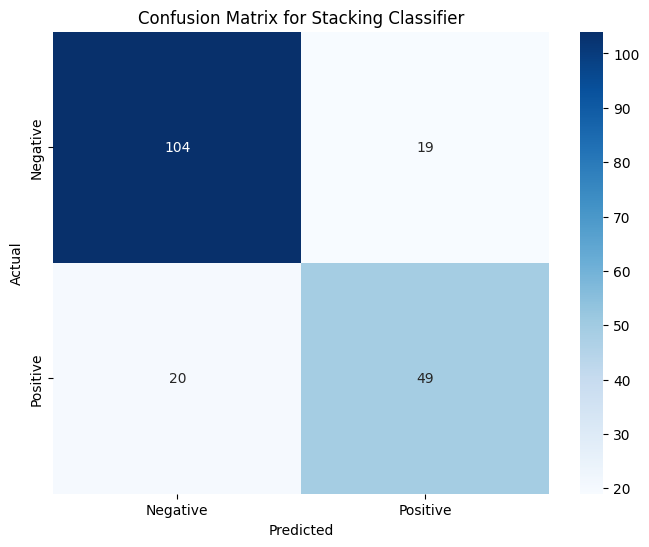

Classification Report for Stacking Classifier:

              precision    recall  f1-score   support

    Negative       0.84      0.85      0.84       123
    Positive       0.72      0.71      0.72        69

    accuracy                           0.80       192
   macro avg       0.78      0.78      0.78       192
weighted avg       0.80      0.80      0.80       192



<Figure size 800x600 with 0 Axes>

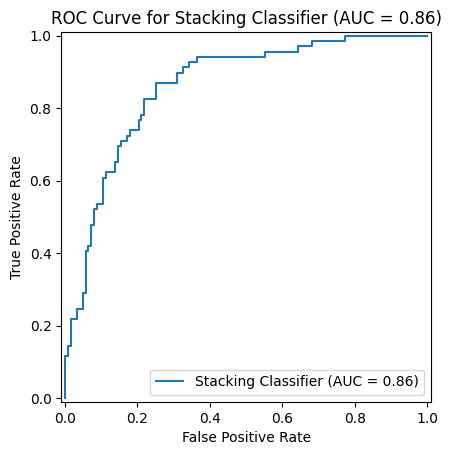

<Figure size 800x600 with 0 Axes>

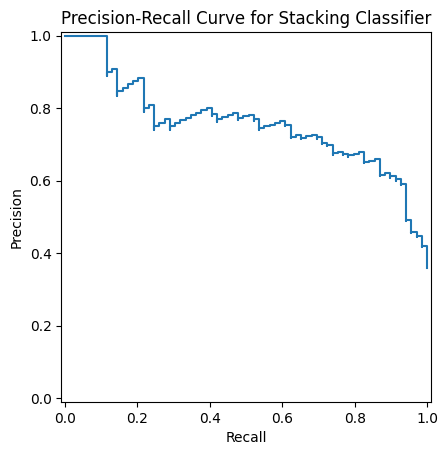

In [111]:
### 6. Stacking Classifier (Advanced Ensemble Method)
estimators = [
    ('knn', knn_best),
    ('log_reg', log_reg_best),
    ('svm', svm_best),
    ('rf', rf_best),
    ('xgb', xgb_best)
]

from sklearn.ensemble import StackingClassifier

# Create the stacking classifier
stacking_clf = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression())

# Fit the stacking classifier on the balanced training data
stacking_clf.fit(X_train_balanced, Y_train_balanced)

# Get predictions on the test set using the stacking classifier
stacking_pred = stacking_clf.predict(X_test_scaled)

# 1. Confusion Matrix
cm_stacking = confusion_matrix(Y_test, stacking_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_stacking, annot=True, fmt='d', cmap='Blues', xticklabels=["Negative", "Positive"], yticklabels=["Negative", "Positive"])
plt.title('Confusion Matrix for Stacking Classifier')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

# 2. Classification Report (Precision, Recall, F1-score)
print("Classification Report for Stacking Classifier:\n")
print(classification_report(Y_test, stacking_pred, target_names=["Negative", "Positive"]))

# 3. ROC Curve and AUC Score
fpr_stacking, tpr_stacking, thresholds_stacking = roc_curve(Y_test, stacking_clf.predict_proba(X_test_scaled)[:, 1])
roc_auc_stacking = auc(fpr_stacking, tpr_stacking)

# Plot ROC Curve
plt.figure(figsize=(8, 6))
RocCurveDisplay(fpr=fpr_stacking, tpr=tpr_stacking, roc_auc=roc_auc_stacking, estimator_name="Stacking Classifier").plot()
plt.title(f'ROC Curve for Stacking Classifier (AUC = {roc_auc_stacking:.2f})')
plt.show()

# 4. Precision-Recall Curve
precision_stacking, recall_stacking, thresholds_stacking = precision_recall_curve(Y_test, stacking_clf.predict_proba(X_test_scaled)[:, 1])

# Plot Precision-Recall Curve
plt.figure(figsize=(8, 6))
PrecisionRecallDisplay(precision=precision_stacking, recall=recall_stacking).plot()
plt.title('Precision-Recall Curve for Stacking Classifier')
plt.show()


In [112]:
stacking_clf = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression())
stacking_clf.fit(X_train_balanced, Y_train_balanced)
stacking_pred = stacking_clf.predict(X_test_scaled)
stacking_acc = accuracy_score(Y_test, stacking_pred)


In [113]:
# Print accuracies for all models
print(f"KNN Accuracy: {accuracy_score(Y_test, knn_best.predict(X_test_scaled)):.16f}")
print(f"Logistic Regression Accuracy: {accuracy_score(Y_test, log_reg_best.predict(X_test_scaled)):.16f}")
print(f"SVM Accuracy: {accuracy_score(Y_test, svm_best.predict(X_test_scaled)):.16f}")
print(f"Random Forest Accuracy: {accuracy_score(Y_test, rf_best.predict(X_test_scaled)):.16f}")
print(f"XGBoost Accuracy: {accuracy_score(Y_test, xgb_best.predict(X_test_scaled)):.16f}")
print(f"Stacking Classifier Accuracy: {stacking_acc:.16f}")

KNN Accuracy: 0.7187500000000000
Logistic Regression Accuracy: 0.8072916666666666
SVM Accuracy: 0.7500000000000000
Random Forest Accuracy: 0.8020833333333334
XGBoost Accuracy: 0.7291666666666666
Stacking Classifier Accuracy: 0.7968750000000000


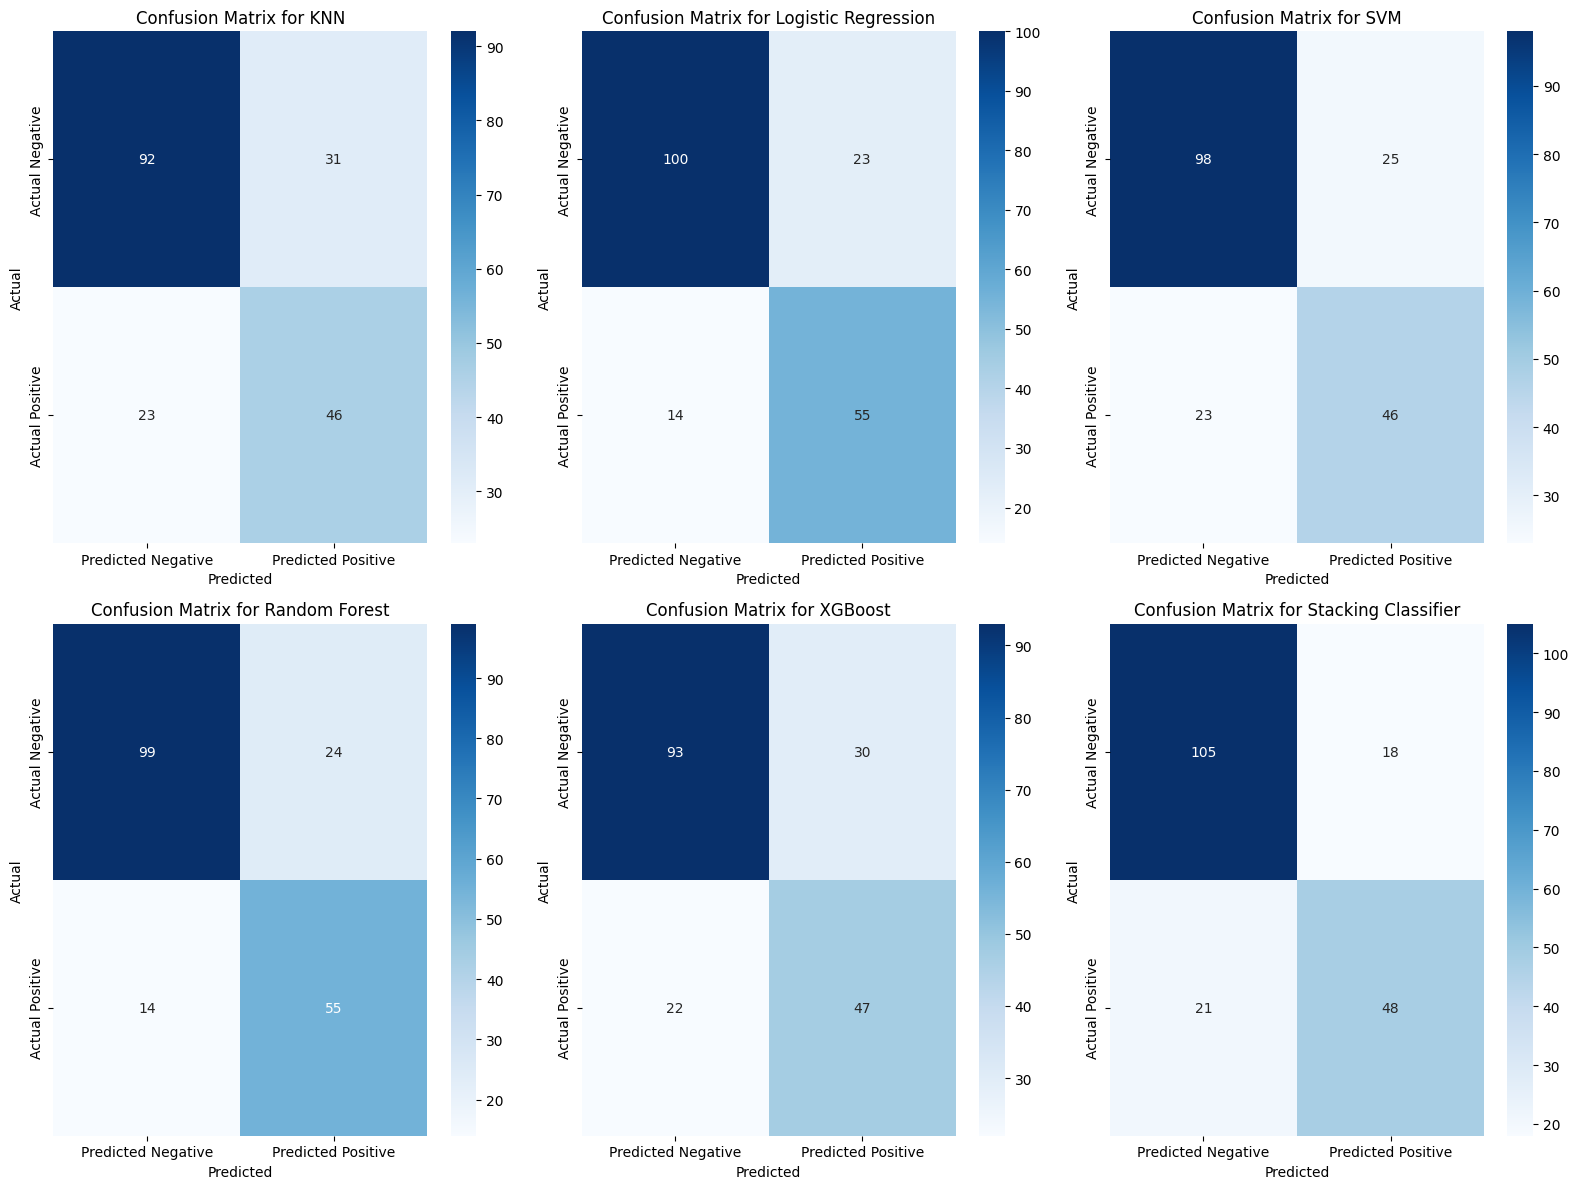


Accuracies for All Models:

KNN Accuracy: 0.7187500000000000
Logistic Regression Accuracy: 0.8072916666666666
SVM Accuracy: 0.7500000000000000
Random Forest Accuracy: 0.8020833333333334
XGBoost Accuracy: 0.7291666666666666
Stacking Classifier Accuracy: 0.7968750000000000


In [114]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score

# Calculate accuracies for all models
accuracies = {
    "KNN": accuracy_score(Y_test, knn_best.predict(X_test_scaled)),
    "Logistic Regression": accuracy_score(Y_test, log_reg_best.predict(X_test_scaled)),
    "SVM": accuracy_score(Y_test, svm_best.predict(X_test_scaled)),
    "Random Forest": accuracy_score(Y_test, rf_best.predict(X_test_scaled)),
    "XGBoost": accuracy_score(Y_test, xgb_best.predict(X_test_scaled)),
    "Stacking Classifier": accuracy_score(Y_test, stacking_clf.predict(X_test_scaled))
}

# Create confusion matrices for each model
cm_data = {}
for model_name, model in zip(accuracies.keys(), [knn_best, log_reg_best, svm_best, rf_best, xgb_best, stacking_clf]):
    cm = confusion_matrix(Y_test, model.predict(X_test_scaled))
    cm_data[model_name] = cm

# Convert confusion matrices to DataFrames for easier plotting
cm_df = {}
for model_name, cm in cm_data.items():
    cm_df[model_name] = pd.DataFrame(cm, index=["Actual Negative", "Actual Positive"], columns=["Predicted Negative", "Predicted Positive"])

# Plot confusion matrices
plt.figure(figsize=(16, 12))
for i, (model_name, df) in enumerate(cm_df.items(), 1):
    plt.subplot(2, 3, i)
    sns.heatmap(df, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix for {model_name}')
    plt.ylabel('Actual')
    plt.xlabel('Predicted')

plt.tight_layout()
plt.show()

# Print accuracies
print("\nAccuracies for All Models:\n")
for model_name, accuracy in accuracies.items():
    print(f"{model_name} Accuracy: {accuracy:.16f}")


In [115]:
def predict_diabetes(model, input_data):
    # Ensure the input data is in the same format as your training data
    # Convert input data into a DataFrame if needed
    input_df = pd.DataFrame([input_data], columns=["Pregnancies", "Glucose", "BloodPressure",
                                                   "SkinThickness", "Insulin", "BMI",
                                                   "DiabetesPedigreeFunction", "Age"])

    # Scale the input data using the same scaler as during training
    input_scaled = scaler.transform(input_df)

    # Make the prediction using the specified model
    prediction = model.predict(input_scaled)

    # Output the prediction result
    if prediction[0] == 1:
        return "Diabetes Positive (Outcome = 1)"
    else:
        return "Diabetes Negative (Outcome = 0)"

# Example: Make a prediction using the Stacking Classifier
# Input format: [Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction, Age]
input_data = [2, 120, 70, 35, 130, 28.5, 0.627, 25]  # Example input data
print(predict_diabetes(stacking_clf, input_data))


Diabetes Negative (Outcome = 0)


In [116]:
import numpy as np

def find_diabetes_positive_values(model, feature_ranges, threshold=1):
    # Generate random input values within specified feature ranges
    feature_names = ["Pregnancies", "Glucose", "BloodPressure", "SkinThickness",
                     "Insulin", "BMI", "DiabetesPedigreeFunction", "Age"]

    # Loop through to find a combination that predicts '1'
    for i in range(10000):  # Number of iterations to try
        input_values = [np.random.uniform(low, high) for (low, high) in feature_ranges]

        # Create a DataFrame and scale the input data
        input_df = pd.DataFrame([input_values], columns=feature_names)
        input_scaled = scaler.transform(input_df)

        # Predict with the model
        prediction = model.predict(input_scaled)

        if prediction[0] == 1:
            print(f"Found Positive Prediction: {input_values}")
            return input_values

    return "No positive prediction found in given range."

# Define reasonable ranges for each feature based on domain knowledge
feature_ranges = [
    (0, 10),  # Pregnancies
    (80, 200),  # Glucose
    (60, 120),  # BloodPressure
    (0, 50),  # SkinThickness
    (0, 600),  # Insulin
    (18, 50),  # BMI
    (0.1, 2.5),  # DiabetesPedigreeFunction
    (20, 80)  # Age
]

# Example: Finding input values for the stacking classifier that yield a prediction of '1'
find_diabetes_positive_values(stacking_clf, feature_ranges)


Found Positive Prediction: [7.919837956380923, 172.61954830144686, 116.63441477018256, 20.734765169751174, 369.8066234085163, 45.12979213711931, 1.4737873998270614, 50.76599533659134]


[7.919837956380923,
 172.61954830144686,
 116.63441477018256,
 20.734765169751174,
 369.8066234085163,
 45.12979213711931,
 1.4737873998270614,
 50.76599533659134]

In [117]:
# The found input values that gave a positive prediction
input_values = [7.370288757817138, 174.2515768057976, 89.33113982643731,
                3.417753661706441, 406.1612245176545, 38.54006513888253,
                0.8993863919062286, 43.858006156632825]

# Convert the input values into a DataFrame
input_df = pd.DataFrame([input_values], columns=["Pregnancies", "Glucose", "BloodPressure",
                                                 "SkinThickness", "Insulin", "BMI",
                                                 "DiabetesPedigreeFunction", "Age"])

# Scale the input values using the same scaler used during training
input_scaled = scaler.transform(input_df)

# Use the stacking classifier (or any other trained model) to predict the outcome
prediction = stacking_clf.predict(input_scaled)

# Output the prediction result
if prediction[0] == 1:
    print("Prediction: Diabetes Positive (Outcome = 1)")
else:
    print("Prediction: Diabetes Negative (Outcome = 0)")


Prediction: Diabetes Positive (Outcome = 1)


In [ ]:
# Here increased XGBoost Prediction Accuracy to some amount

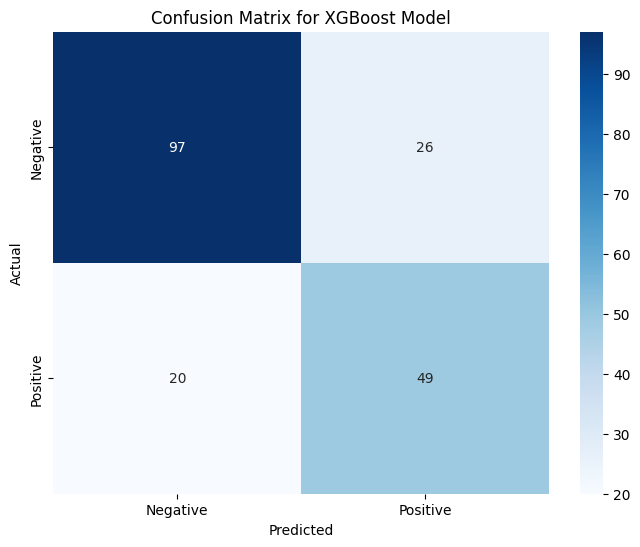

Classification Report for XGBoost Model:

              precision    recall  f1-score   support

    Negative       0.83      0.79      0.81       123
    Positive       0.65      0.71      0.68        69

    accuracy                           0.76       192
   macro avg       0.74      0.75      0.74       192
weighted avg       0.77      0.76      0.76       192



<Figure size 800x600 with 0 Axes>

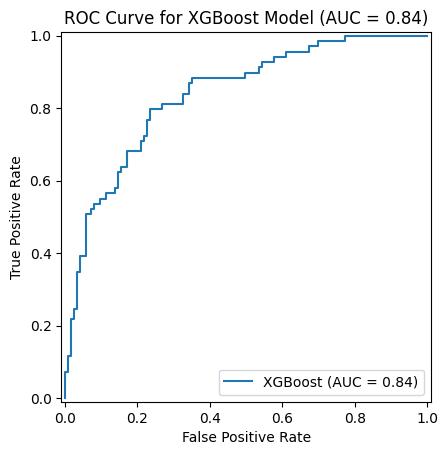

<Figure size 800x600 with 0 Axes>

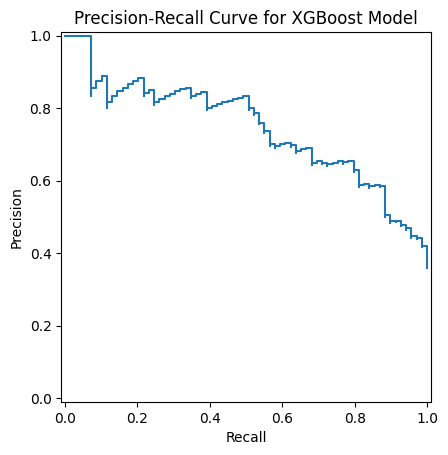

In [118]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc, precision_recall_curve
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Improved hyperparameter grid
xgb_params = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],  # Added a smaller learning rate for better convergence
    'max_depth': [3, 5, 7, 10],               # Modified to include a deeper tree
    'min_child_weight': [1, 3, 5],            # New hyperparameter to control overfitting
    'subsample': [0.7, 0.8, 0.9, 1.0],        # New hyperparameter to prevent overfitting
    'colsample_bytree': [0.6, 0.8, 1.0]       # New hyperparameter to control feature selection
}

xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
grid_xgb = GridSearchCV(xgb, xgb_params, cv=5, scoring='accuracy', n_jobs=-1)  # Parallel processing
grid_xgb.fit(X_train_balanced, Y_train_balanced)
xgb_best = grid_xgb.best_estimator_

# Get predictions on the test set using the best XGBoost model
xgb_pred = xgb_best.predict(X_test_scaled)

# 1. Confusion Matrix
cm_xgb = confusion_matrix(Y_test, xgb_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_xgb, annot=True, fmt='d', cmap='Blues', xticklabels=["Negative", "Positive"], yticklabels=["Negative", "Positive"])
plt.title('Confusion Matrix for XGBoost Model')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

# 2. Classification Report (Precision, Recall, F1-score)
print("Classification Report for XGBoost Model:\n")
print(classification_report(Y_test, xgb_pred, target_names=["Negative", "Positive"]))

# 3. ROC Curve and AUC Score
fpr_xgb, tpr_xgb, thresholds_xgb = roc_curve(Y_test, xgb_best.predict_proba(X_test_scaled)[:, 1])
roc_auc_xgb = auc(fpr_xgb, tpr_xgb)

# Plot ROC Curve
plt.figure(figsize=(8, 6))
RocCurveDisplay(fpr=fpr_xgb, tpr=tpr_xgb, roc_auc=roc_auc_xgb, estimator_name="XGBoost").plot()
plt.title(f'ROC Curve for XGBoost Model (AUC = {roc_auc_xgb:.2f})')
plt.show()

# 4. Precision-Recall Curve
precision_xgb, recall_xgb, thresholds_xgb = precision_recall_curve(Y_test, xgb_best.predict_proba(X_test_scaled)[:, 1])

# Plot Precision-Recall Curve
plt.figure(figsize=(8, 6))
PrecisionRecallDisplay(precision=precision_xgb, recall=recall_xgb).plot()
plt.title('Precision-Recall Curve for XGBoost Model')
plt.show()


In [119]:
# Calculate accuracy
xgb_accuracy = accuracy_score(Y_test, xgb_pred)
print(f"XGBoost Model Accuracy: {xgb_accuracy:.16f}")

XGBoost Model Accuracy: 0.7604166666666666


In [ ]:
# Here increased RandomForestClassifiers Accuracy to an extent

Random Forest Model Accuracy: 0.8125000000000000


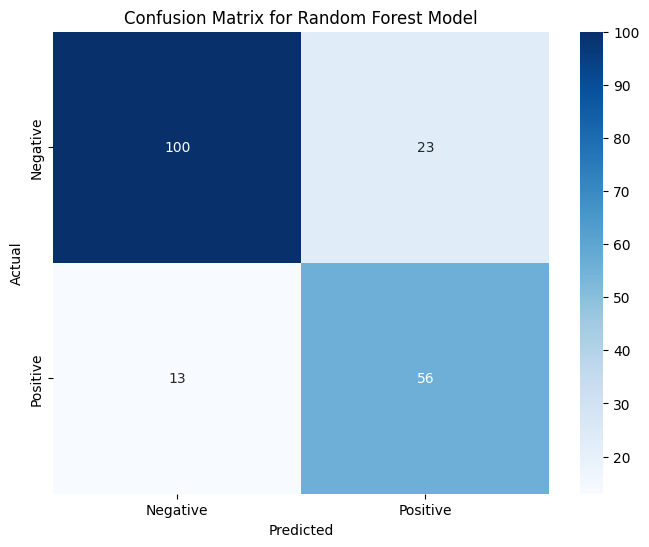

Classification Report for Random Forest Model:

              precision    recall  f1-score   support

    Negative       0.88      0.81      0.85       123
    Positive       0.71      0.81      0.76        69

    accuracy                           0.81       192
   macro avg       0.80      0.81      0.80       192
weighted avg       0.82      0.81      0.81       192



<Figure size 800x600 with 0 Axes>

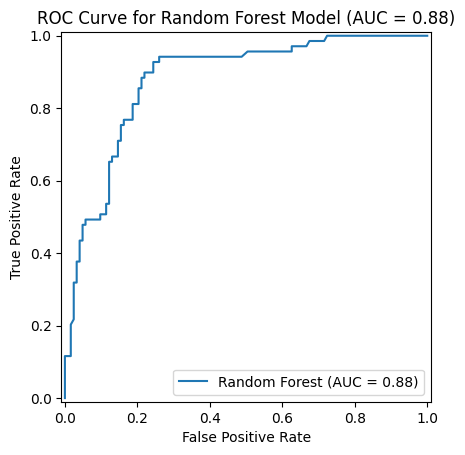

<Figure size 800x600 with 0 Axes>

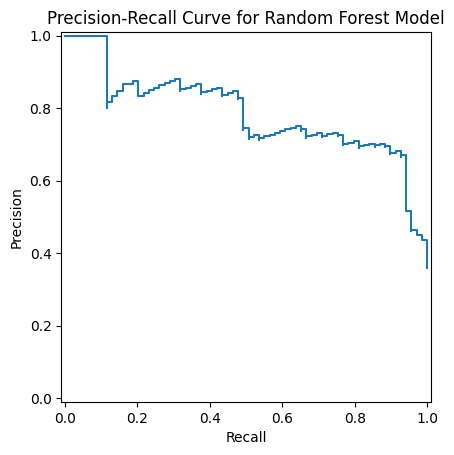

In [120]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc, precision_recall_curve, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Enhanced hyperparameter grid
rf_params = {
    'n_estimators': [100, 200, 300, 500],          # Added more estimators
    'max_depth': [5, 10, 15, 20, None],            # Include None to allow unlimited depth
    'criterion': ['gini', 'entropy'],              # Same as before
    'min_samples_split': [2, 5, 10],               # New hyperparameter to control overfitting
    'min_samples_leaf': [1, 2, 4],                 # New hyperparameter to control the minimum samples required at a leaf node
    'max_features': ['auto', 'sqrt', 'log2']       # New hyperparameter to control the number of features considered for the best split
}

rf = RandomForestClassifier(random_state=42)  # Set a random state for reproducibility
grid_rf = GridSearchCV(rf, rf_params, cv=5, scoring='accuracy', n_jobs=-1)  # Parallel processing
grid_rf.fit(X_train_balanced, Y_train_balanced)
rf_best = grid_rf.best_estimator_

# Get predictions on the test set using the best Random Forest model
rf_pred = rf_best.predict(X_test_scaled)

# Calculate accuracy
rf_accuracy = accuracy_score(Y_test, rf_pred)
print(f"Random Forest Model Accuracy: {rf_accuracy:.16f}")

# 1. Confusion Matrix
cm_rf = confusion_matrix(Y_test, rf_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', xticklabels=["Negative", "Positive"], yticklabels=["Negative", "Positive"])
plt.title('Confusion Matrix for Random Forest Model')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

# 2. Classification Report (Precision, Recall, F1-score)
print("Classification Report for Random Forest Model:\n")
print(classification_report(Y_test, rf_pred, target_names=["Negative", "Positive"]))

# 3. ROC Curve and AUC Score
fpr_rf, tpr_rf, thresholds_rf = roc_curve(Y_test, rf_best.predict_proba(X_test_scaled)[:, 1])
roc_auc_rf = auc(fpr_rf, tpr_rf)

# Plot ROC Curve
plt.figure(figsize=(8, 6))
RocCurveDisplay(fpr=fpr_rf, tpr=tpr_rf, roc_auc=roc_auc_rf, estimator_name="Random Forest").plot()
plt.title(f'ROC Curve for Random Forest Model (AUC = {roc_auc_rf:.2f})')
plt.show()

# 4. Precision-Recall Curve
precision_rf, recall_rf, thresholds_rf = precision_recall_curve(Y_test, rf_best.predict_proba(X_test_scaled)[:, 1])

# Plot Precision-Recall Curve
plt.figure(figsize=(8, 6))
PrecisionRecallDisplay(precision=precision_rf, recall=recall_rf).plot()
plt.title('Precision-Recall Curve for Random Forest Model')
plt.show()


In [122]:
def predict_diabetes(model, input_data):
    # Ensure the input data is in the same format as your training data
    # Convert input data into a DataFrame if needed
    input_df = pd.DataFrame([input_data], columns=["Pregnancies", "Glucose", "BloodPressure",
                                                   "SkinThickness", "Insulin", "BMI",
                                                   "DiabetesPedigreeFunction", "Age"])

    # Scale the input data using the same scaler as during training
    input_scaled = scaler.transform(input_df)

    # Make the prediction using the specified model
    prediction = model.predict(input_scaled)

    # Output the prediction result
    if prediction[0] == 1:
        return "Diabetes Positive (Outcome = 1)"
    else:
        return "Diabetes Negative (Outcome = 0)"

# Example: Make a prediction using the Stacking Classifier
# Input format: [Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction, Age]
input_data = [2, 120, 70, 35, 130, 28.5, 0.627, 25]  # Example input data
print(predict_diabetes(rf_best, input_data))


Diabetes Negative (Outcome = 0)


In [123]:
import numpy as np

def find_diabetes_positive_values(model, feature_ranges, threshold=1):
    # Generate random input values within specified feature ranges
    feature_names = ["Pregnancies", "Glucose", "BloodPressure", "SkinThickness",
                     "Insulin", "BMI", "DiabetesPedigreeFunction", "Age"]

    # Loop through to find a combination that predicts '1'
    for i in range(10000):  # Number of iterations to try
        input_values = [np.random.uniform(low, high) for (low, high) in feature_ranges]

        # Create a DataFrame and scale the input data
        input_df = pd.DataFrame([input_values], columns=feature_names)
        input_scaled = scaler.transform(input_df)

        # Predict with the model
        prediction = model.predict(input_scaled)

        if prediction[0] == 1:
            print(f"Found Positive Prediction: {input_values}")
            return input_values

    return "No positive prediction found in given range."

# Define reasonable ranges for each feature based on domain knowledge
feature_ranges = [
    (0, 10),  # Pregnancies
    (80, 200),  # Glucose
    (60, 120),  # BloodPressure
    (0, 50),  # SkinThickness
    (0, 600),  # Insulin
    (18, 50),  # BMI
    (0.1, 2.5),  # DiabetesPedigreeFunction
    (20, 80)  # Age
]

# Example: Finding input values for the stacking classifier that yield a prediction of '1'
find_diabetes_positive_values(rf_best, feature_ranges)


Found Positive Prediction: [1.3496021565859684, 120.33756335825005, 69.14454173488822, 46.66806435932758, 529.2960608614172, 32.33214278417326, 2.25294666208751, 78.0754810843042]


[1.3496021565859684,
 120.33756335825005,
 69.14454173488822,
 46.66806435932758,
 529.2960608614172,
 32.33214278417326,
 2.25294666208751,
 78.0754810843042]

In [124]:
# The found input values that gave a positive prediction
input_values = [1.3496021565859684, 120.33756335825005, 69.14454173488822,
                46.66806435932758, 529.2960608614172, 32.33214278417326,
                2.25294666208751, 78.0754810843042]

# Convert the input values into a DataFrame
input_df = pd.DataFrame([input_values], columns=["Pregnancies", "Glucose", "BloodPressure",
                                                 "SkinThickness", "Insulin", "BMI",
                                                 "DiabetesPedigreeFunction", "Age"])

# Scale the input values using the same scaler used during training
input_scaled = scaler.transform(input_df)

# Use the stacking classifier (or any other trained model) to predict the outcome
prediction = rf_best.predict(input_scaled)

# Output the prediction result
if prediction[0] == 1:
    print("Prediction: Diabetes Positive (Outcome = 1)")
else:
    print("Prediction: Diabetes Negative (Outcome = 0)")


Prediction: Diabetes Positive (Outcome = 1)


<Figure size 800x600 with 0 Axes>

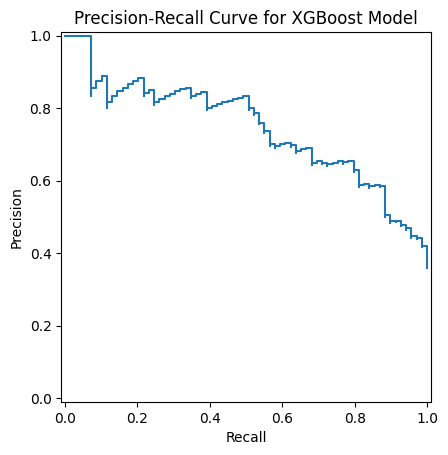

<Figure size 800x600 with 0 Axes>

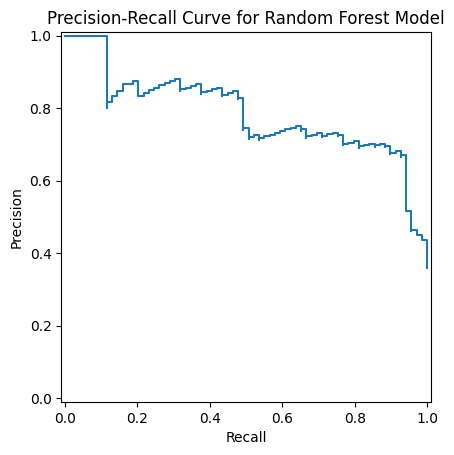

XGBoost Model Accuracy: 0.7604166666666666
Random Forest Model Accuracy: 0.8125000000000000


In [125]:
# Precision-Recall Curves
def plot_precision_recall_curve(precision, recall, model_name):
    plt.figure(figsize=(8, 6))
    PrecisionRecallDisplay(precision=precision, recall=recall).plot()
    plt.title(f'Precision-Recall Curve for {model_name}')
    plt.show()

# Precision-Recall Curve for XGBoost
precision_xgb, recall_xgb, _ = precision_recall_curve(Y_test, xgb_best.predict_proba(X_test_scaled)[:, 1])
plot_precision_recall_curve(precision_xgb, recall_xgb, 'XGBoost Model')

# Precision-Recall Curve for Random Forest
precision_rf, recall_rf, _ = precision_recall_curve(Y_test, rf_best.predict_proba(X_test_scaled)[:, 1])
plot_precision_recall_curve(precision_rf, recall_rf, 'Random Forest Model')

# Calculate accuracy for both models
xgb_accuracy = accuracy_score(Y_test, xgb_pred)
rf_accuracy = accuracy_score(Y_test, rf_pred)
print(f"XGBoost Model Accuracy: {xgb_accuracy:.16f}")
print(f"Random Forest Model Accuracy: {rf_accuracy:.16f}")

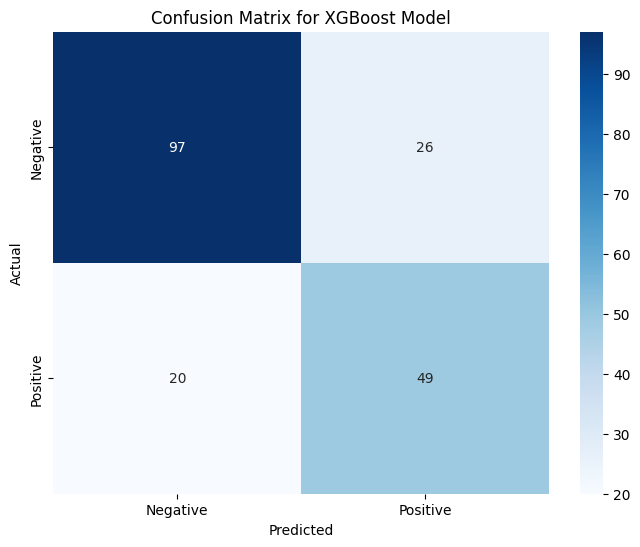

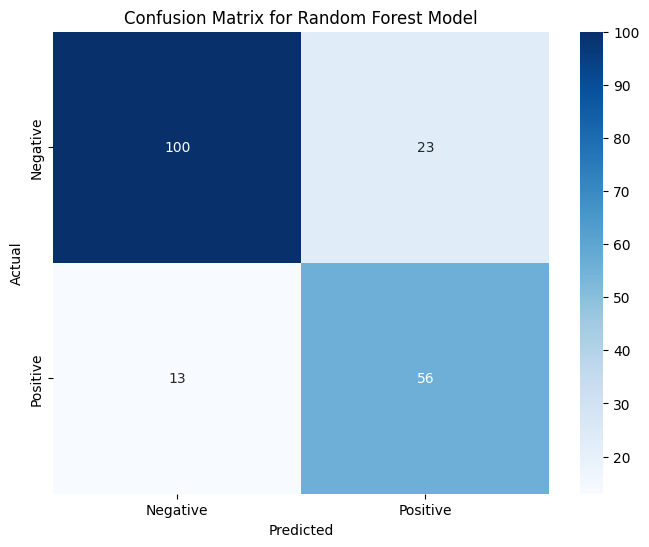

Confusion Matrix for XGBoost:
 [[97 26]
 [20 49]]
Confusion Matrix for Random Forest:
 [[100  23]
 [ 13  56]]


In [126]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Generate confusion matrices
cm_xgb = confusion_matrix(Y_test, xgb_pred)
cm_rf = confusion_matrix(Y_test, rf_pred)

# Function to plot confusion matrix
def plot_confusion_matrix(cm, title):
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=["Negative", "Positive"],
                yticklabels=["Negative", "Positive"])
    plt.title(title)
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

# Plot confusion matrices
plot_confusion_matrix(cm_xgb, 'Confusion Matrix for XGBoost Model')
plot_confusion_matrix(cm_rf, 'Confusion Matrix for Random Forest Model')

# Optionally, print confusion matrix values
print("Confusion Matrix for XGBoost:\n", cm_xgb)
print("Confusion Matrix for Random Forest:\n", cm_rf)


In [128]:
import pandas as pd
from sklearn.metrics import accuracy_score

# Input values as per the feature columns
input_values = [1.3496021565859684, 120.33756335825005, 69.14454173488822,
                46.66806435932758, 529.2960608614172, 32.33214278417326,
                2.25294666208751, 78.0754810843042]

# Create a DataFrame with the input values
input_df = pd.DataFrame([input_values], columns=["Pregnancies", "Glucose", "BloodPressure",
                                                 "SkinThickness", "Insulin", "BMI",
                                                 "DiabetesPedigreeFunction", "Age"])

# Scale the input values using the same scaler used during training
input_scaled = scaler.transform(input_df)  # Ensure 'scaler' is defined

# Use the best models to predict the outcome for the input values
xgb_prediction = xgb_best.predict(input_scaled)
rf_prediction = rf_best.predict(input_scaled)

# Output the prediction results
print("Predictions:")
print(f"XGBoost Prediction: {'Diabetes Positive (Outcome = 1)' if xgb_prediction[0] == 1 else 'Diabetes Negative (Outcome = 0)'}")
print(f"Random Forest Prediction: {'Diabetes Positive (Outcome = 1)' if rf_prediction[0] == 1 else 'Diabetes Negative (Outcome = 0)'}")

# Assume you have true label for this input to calculate accuracies
true_label = 1  # Replace with the actual true label if available

# Calculate accuracies based on predictions
xgb_accuracy = accuracy_score([true_label], xgb_prediction)
rf_accuracy = accuracy_score([true_label], rf_prediction)

# Display the accuracy for each model
print(f"XGBoost Model Accuracy for Input: {xgb_accuracy:.16f}")
print(f"Random Forest Model Accuracy for Input: {rf_accuracy:.16f}")

# To evaluate feature importance, you can get feature importances from the trained models
xgb_importance = xgb_best.feature_importances_
rf_importance = rf_best.feature_importances_

# Create a DataFrame for feature importances
feature_names = ["Pregnancies", "Glucose", "BloodPressure", "SkinThickness",
                 "Insulin", "BMI", "DiabetesPedigreeFunction", "Age"]

importance_df = pd.DataFrame({
    'Feature': feature_names,
    'XGBoost Importance': xgb_importance,
    'Random Forest Importance': rf_importance
})

# Display the feature importance
print("\nFeature Importances:")
print(importance_df)


Predictions:
XGBoost Prediction: Diabetes Negative (Outcome = 0)
Random Forest Prediction: Diabetes Positive (Outcome = 1)
XGBoost Model Accuracy for Input: 0.0000000000000000
Random Forest Model Accuracy for Input: 1.0000000000000000

Feature Importances:
                    Feature  XGBoost Importance  Random Forest Importance
0               Pregnancies            0.091892                  0.084551
1                   Glucose            0.200156                  0.253865
2             BloodPressure            0.089157                  0.079476
3             SkinThickness            0.109228                  0.073787
4                   Insulin            0.147971                  0.102220
5                       BMI            0.126273                  0.162522
6  DiabetesPedigreeFunction            0.096898                  0.106589
7                       Age            0.138424                  0.136989
